## **This notebook has been adapted not to include data sources as restrictions apply.**

#### Evanya Wilson
#### August 23rd, 2021

# Where should I live in the new work from home era?

### Background

Living through the pandemic, it has become quite evident that we can easily work from home, and no longer need to go into the office. Many companies are now opting for completely remote work, or a hybrid model of some sort. 
By now, most of us have probably considered the idea of working from a new place, some even long term. 

I would like this project to encourage people to take advantage of moving to a new city, and allow them to consider a new place to live feasibly, based on their current living expenditures and environment. 

I will build a recommendation system to recommend another city that has similar attributes to one's current city.

### Data
https://www.numbeo.com/cost-of-living/

Numbeo.com provides cost of living and quality of life information on different cities across the world. Most of the features are indexed based on NYC standards. NYC being 100. So a value of 120 would be 20% more than NYC cost, and  a value of 80 would be 20% less than NYC cost. Currency exchange rates have been accounted for.

Tables and the variables in each are described below:
 
**Data Dictionary:**

**Cost of Living Table**
- City
- Cost of Living Index
- Rent Index
- Cost of Living Plus Rent Index
- Groceries Index
- Restaurant Price Index
- Local Purchasing Power Index

**Quality of Life Table**
- City
- Quality of Life Index
- Purchasing Power Index
- Safety Index
- Health Care Index
- Cost of Living Index
- Property Price to Income Ratio
- Traffic Commute Time Index
- Pollution Index
- Climate Index

**Property Prices Table**
- City
- Price To Income Ratio
- Gross Rental Yield City Centre
- Gross Rental Yield Outside of Centre
- Price To Rent Ratio City Centre
- Price To Rent Ratio Outside Of City Centre
- Mortgage As A Percentage Of Income
- Affordability Index

'City' is the categorical feature of interest, all other features are numerical.

In [19]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

All the tables have different shapes. When merging on city, I imagine I will lose alot of rows. due to the nature of the data, I will not be able to impute values accurately.

# Merging the dataframes together
I will go ahead a merge all three tables together on 'City' before cleaning the data.

In [13]:
# merging col & qol df's
merge1 = pd.merge(col_df, qol_df, on='City')

In [14]:
# merging pp df
merge2 = pd.merge(merge1, pp_df, on='City')

In [15]:
#checking the final shape
merge2.shape

(232, 26)

In [16]:
# veiwing the final dataframe
merge2.head()

Rank_x                         City  Cost of Living Index_x  Rent Index  \
0     NaN          Zurich, Switzerland                  129.76       71.87   
1     NaN              Beirut, Lebanon                  128.71       30.47   
2     NaN          Geneva, Switzerland                  120.88       72.95   
3     NaN  Honolulu, HI, United States                  104.32       67.28   
4     NaN                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Rank_y  Quality of Life Index  ...  \
0                        112.94     NaN                 193.31  ...   
1                         14.63     NaN                  76.83  ...   
2                        106.34     NaN                 184.17  ...   
3                         70.16     NaN                 152.70  ...   
4                         81.05     NaN                 163.46  ...   

   Pollution Index  Climate Index  Rank  Price To Income Ratio  \
0            18.00          81.48   NaN                   8.22   
1            93.51          94.74   NaN                  17.85   
2            25.49          82.61   NaN                   9.44   
3            36.66          95.33   NaN                   8.70   
4            23.72          59.99   NaN                  10.63   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85  
3                               62.36                 1.60  
4                               67.97                 1.47  

[5 rows x 26 columns]

After merging the tables, some rows were discarded as not all the tables had the same cities. The full dataset now has 230 rows with 26 columns. Some of these colunmns I will have to drop as they either have missing values (numbeo rankings) or may have duplicate infomation.

# PreProcessing

In [17]:
# veiwing all the column names
merge2.columns

Index(['Rank_x', 'City', 'Cost of Living Index_x', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Rank_y',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Cost of Living Index_y',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Rank', 'Price To Income Ratio',
       'Gross Rental Yield City Centre',
       'Gross Rental Yield Outside of Centre',
       'Price To Rent Ratio City Centre',
       'Price To Rent Ratio Outside Of City Centre',
       'Mortgage As A Percentage Of Income', 'Affordability Index'],
      dtype='object')

In [19]:
# checking if some of the colums have duplicate information
merge2[['Cost of Living Index_x',
       'Cost of Living Index_y',
       'Property Price to Income Ratio',
       'Price To Income Ratio',
       'Gross Rental Yield City Centre',
       'Price To Rent Ratio City Centre',
       'Gross Rental Yield Outside of Centre',
       'Price To Rent Ratio Outside Of City Centre',
       'Mortgage As A Percentage Of Income',
       'Affordability Index',
       'Purchasing Power Index']]

Cost of Living Index_x  Cost of Living Index_y  \
0                    129.76                  129.76   
1                    128.71                  128.71   
2                    120.88                  120.88   
3                    104.32                  104.32   
4                    102.45                  102.45   
..                      ...                     ...   
227                   24.16                   24.16   
228                   23.75                   23.75   
229                   22.45                   22.45   
230                   21.68                   21.68   
231                   21.63                   21.63   

     Property Price to Income Ratio  Price To Income Ratio  \
0                              8.22                   8.22   
1                             17.85                  17.85   
2                              9.44                   9.44   
3                              8.70                   8.70   
4                             10.63                  10.63   
..                              ...                    ...   
227                            7.85                   7.85   
228                            9.99                   9.99   
229                            9.72                   9.72   
230                           14.15                  14.15   
231                           13.98                  13.98   

     Gross Rental Yield City Centre  Price To Rent Ratio City Centre  \
0                              3.29                            30.39   
1                              5.94                            16.84   
2                              3.28                            30.51   
3                              5.36                            18.67   
4                              3.10                            32.29   
..                              ...                              ...   
227                            4.25                            23.53   
228                            3.83                            26.10   
229                            6.07                            16.48   
230                            3.61                            27.67   
231                            4.13                            24.20   

     Gross Rental Yield Outside of Centre  \
0                                    3.67   
1                                    7.10   
2                                    3.46   
3                                    6.28   
4                                    3.87   
..                                    ...   
227                                  4.23   
228                                  3.88   
229                                  7.22   
230                                  4.42   
231                                  4.30   

     Price To Rent Ratio Outside Of City Centre  \
0                                         27.27   
1                                         14.08   
2                                         28.89   
3                                         15.93   
4                                         25.82   
..                                          ...   
227                                       23.62   
228                                       25.74   
229                                       13.86   
230                                       22.61   
231                                       23.27   

     Mortgage As A Percentage Of Income  Affordability Index  \
0                                 46.21                 2.16   
1                                182.48                 0.55   
2                                 54.08                 1.85   
3                                 62.36                 1.60   
4                                 67.97                 1.47   
..                                  ...                  ...   
227                               80.85                 1.24   
228                              109.78                 0.91   
229 

Looks like the variables 'Property Price To Income Ratio' and 'Price To Income Ratio' have the same information. So I will drop one of those, along with the numbe ranking columns, and the duplicate cost of living column.

In [20]:
# dropping uncessesary columns
full_data = merge2.drop(merge2[['Rank_x', 'Rank_y', 'Rank', 'Price To Income Ratio', 'Cost of Living Index_y']], axis =1)

In [21]:
# seeing the shape of the data
full_data.shape

(232, 21)

In [22]:
# veiwing the data 
full_data.head()

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Property Price to Income Ratio  \
0                  112.94         83.72  ...                            8.22   
1                   14.63         52.79  ...                           17.85   
2                  106.34         72.48  ...                            9.44   
3                   70.16         55.63  ...                            8.70   
4                   81.05         65.32  ...                           10.63   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                       34.93            18.00          81.48   
1                       39.82            93.51          94.74   
2                       25.49            25.49          82.61   
3                       41.19            36.66          95.33   
4                       31.21            23.72          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85  
3                               62.36                 1.60  
4                               67.97                 1.47  

[5 rows x 21 columns]

In [23]:
# checkign there are any na's in the data
full_data.isna().sum()

City                                          0
Cost of Living Index_x                        0
Rent Index                                    0
Cost of Living Plus Rent Index                0
Groceries Index                               0
Restaurant Price Index                        0
Local Purchasing Power Index                  0
Quality of Life Index                         0
Purchasing Power Index                        0
Safety Index                                  0
Health Care Index                             0
Property Price to Income Ratio                0
Traffic Commute Time Index                    0
Pollution Index                               0
Climate Index                                 0
Gross Rental Yield City Centre                0
Gross Rental Yield Outside of Centre          0
Price To Rent Ratio City Centre               0
Price To Rent Ratio Outside Of City Centre    0
Mortgage As A Percentage Of Income            0
Affordability Index                     

In [24]:
# checking if any duplicates in the data
full_data.duplicated().any()

False

In [25]:
# Checking dta types
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   City                                        232 non-null    object 
 1   Cost of Living Index_x                      232 non-null    float64
 2   Rent Index                                  232 non-null    float64
 3   Cost of Living Plus Rent Index              232 non-null    float64
 4   Groceries Index                             232 non-null    float64
 5   Restaurant Price Index                      232 non-null    float64
 6   Local Purchasing Power Index                232 non-null    float64
 7   Quality of Life Index                       232 non-null    float64
 8   Purchasing Power Index                      232 non-null    float64
 9   Safety Index                                232 non-null    float64
 10  Health Care In

I have dropped unecessary & duplicate columns. There are no missing values in the data. All variables have the correct type. I am left with 232 unique cities and 21 features. I can move onto exploring the data! 

# Exploratory Data Analysis
I will dig into the data to understand it on a deeper level, and see what I have to work with.

### How many countries in the data?

In [263]:
split = full_data['City'].str.split(',', expand=True)
split

0             1               2
0        Zurich   Switzerland            None
1        Geneva   Switzerland            None
2      Honolulu            HI   United States
3     Reykjavik       Iceland            None
4      New York            NY   United States
..          ...           ...             ...
225   Mangalore         India            None
226  Coimbatore         India            None
227   Islamabad      Pakistan            None
228      Lahore      Pakistan            None
229     Karachi      Pakistan            None

[230 rows x 3 columns]

In [274]:
split[1].value_counts()

 India                     12
 Canada                    10
 United Kingdom             7
 Germany                    7
 Australia                  6
 Poland                     6
 CA                         6
 Italy                      5
 Ukraine                    5
 Russia                     4
 Romania                    4
 TX                         4
 FL                         4
 Netherlands                4
 Turkey                     4
 United Arab Emirates       3
 Pakistan                   3
 Spain                      3
 OH                         3
 China                      3
 Brazil                     3
 Serbia                     2
 Belgium                    2
 Greece                     2
 MO                         2
 Portugal                   2
 Israel                     2
 AZ                         2
 Czech Republic             2
 Sweden                     2
 South Africa               2
 Thailand                   2
 PA                         2
 NY       

In [270]:
# Counting the unique countries in the data (USA states are not unique)
split[1].nunique()

118

In [266]:
# Counting the cities in the USA
split[2].value_counts()

 United States    49
Name: 2, dtype: int64

118 'unique' countries (and USA states) equal 118. The are 49 USA states in the data, and so a simple calculation of 118 - 49 =  90 countries in the data.

### Stats Summary
I would like to see how the varaibles look statiscally. This will help me determine the scale of the variables, and if I will need to standardize the data.

In [26]:
# Looking at a stats summary of the data
full_data.describe()

Cost of Living Index_x  Rent Index  Cost of Living Plus Rent Index  \
count              232.000000  232.000000                      232.000000   
mean                59.351293   31.672716                       46.588190   
std                 21.227708   19.827244                       19.634415   
min                 21.630000    4.360000                       13.670000   
25%                 39.987500   14.535000                       28.930000   
50%                 63.810000   30.015000                       49.495000   
75%                 74.992500   43.002500                       59.567500   
max                129.760000  117.610000                      105.310000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count       232.000000              232.000000                    232.000000   
mean         54.777026               56.224397                     68.298836   
std          22.368554               24.829967                     33.649953   
min          18.830000               14.630000                      8.640000   
25%          35.162500               32.667500                     38.997500   
50%          55.385000               60.590000                     65.990000   
75%          70.047500               73.485000                     94.922500   
max         150.940000              133.260000                    152.880000   

       Quality of Life Index  Purchasing Power Index  Safety Index  \
count             232.000000              232.000000    232.000000   
mean              139.039569               68.299052     57.064569   
std                35.716213               33.649859     14.666859   
min                37.100000                8.640000     15.470000   
25%               113.472500               38.997500     46.577500   
50%               144.640000               66.000000     57.195000   
75%               167.537500               94.922500     69.282500   
max               203.350000              152.880000     88.200000   

       Health Care Index  Property Price to Income Ratio  \
count         232.000000                      232.000000   
mean           66.876638                       11.325431   
std             9.660304                        8.428983   
min            38.610000                        1.390000   
25%            59.742500                        5.917500   
50%            68.070000                        9.620000   
75%            74.472500                       13.980000   
max            87.240000                       50.890000   

       Traffic Commute Time Index  Pollution Index  Climate Index  \
count                  232.000000       232.000000     232.000000   
mean                    36.219095        50.767026      76.953621   
std                      8.999906        21.101050      17.064050   
min                     16.410000        13.110000      14.280000   
25%                     29.835000        33.440000      67.105000   
50%                     35.060000        49.055000      81.155000   
75%                     41.350000        66.155000      88.645000   
max                     66.780000        95.530000      99.930000   

       Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
count                      232.000000                            232.000000   
mean                         5.500388                              7.083060   
std                          3.549035                              5.520309   
min                          1.030000                              1.210000   
25%                          3.642500                              4.125000   
50%                          4.700000                              5.285000   
75%                          6.525000                              7.535000   
max                         43.570000                             46.740000   

       Price To Rent Ratio City Centre  \
count                       232.000000   
me

I see that the values range from single digits, to in the hundreds. Because of this variation in scale, I will be sure to standardize the data before modeling.

In [27]:
# Creating a numric dataframe in order to look at distributions of each feature
numeric_data = merge2.drop(merge2[['City', 'Rank_x', 'Rank_y', 'Rank', 'Price To Income Ratio', 'Cost of Living Index_y']], axis =1)

In [28]:
numeric_data.head(5)

Cost of Living Index_x  Rent Index  Cost of Living Plus Rent Index  \
0                  129.76       71.87                          103.06   
1                  128.71       30.47                           83.41   
2                  120.88       72.95                           98.78   
3                  104.32       67.28                           87.24   
4                  102.45       48.24                           77.45   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0           131.68                  133.26                        112.94   
1           150.94                  124.52                         14.63   
2           120.73                  125.98                        106.34   
3           117.10                   90.61                         70.16   
4            97.47                  111.25                         81.05   

   Quality of Life Index  Purchasing Power Index  Safety Index  \
0                 193.31                  112.94         83.72   
1                  76.83                   14.63         52.79   
2                 184.17                  106.34         72.48   
3                 152.70                   70.16         55.63   
4                 163.46                   81.05         65.32   

   Health Care Index  Property Price to Income Ratio  \
0              74.43                            8.22   
1              64.94                           17.85   
2              72.80                            9.44   
3              73.02                            8.70   
4              76.68                           10.63   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                       34.93            18.00          81.48   
1                       39.82            93.51          94.74   
2                       25.49            25.49          82.61   
3                       41.19            36.66          95.33   
4                       31.21            23.72          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85  
3                               62.36                 1.60  
4                               67.97                 1.47

### Distribution Plots
Looking at the distributions will also let me know if I need to scale the data.

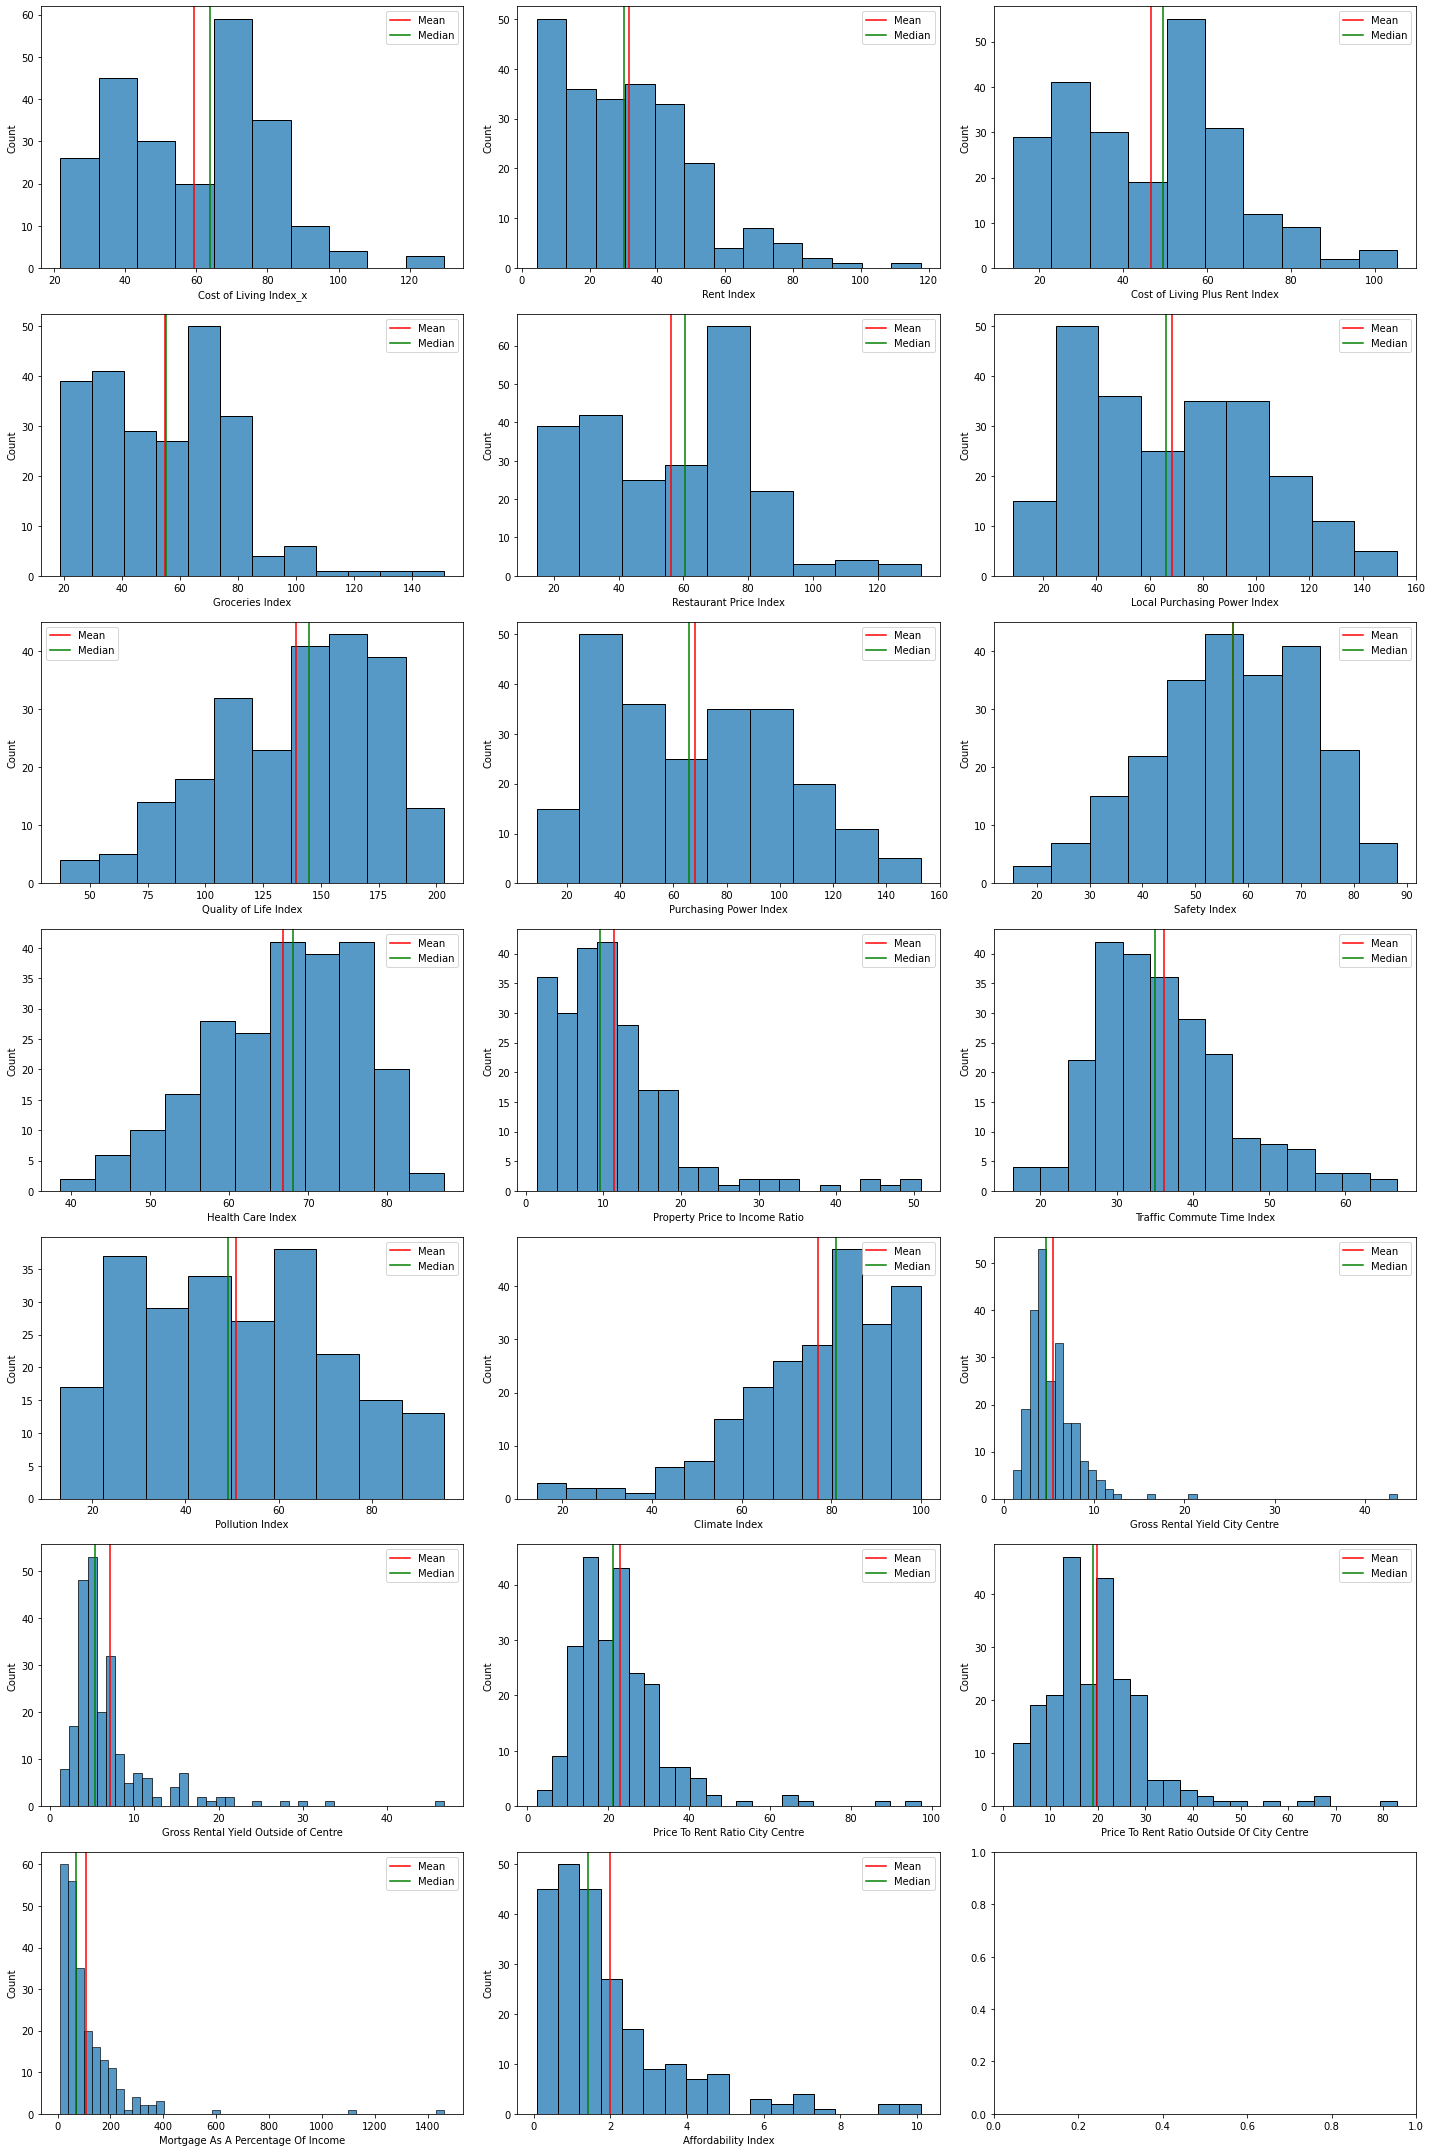

In [29]:
# looking at the distributions of each feature

# Setting up grid of subplots
plt.subplots(7,3,figsize=(20,30))

# Initialize counter
plot_num=1

# Loop through column names in list
for col in numeric_data:
        
    var = numeric_data[col]
    var_mean = var.mean()
    var_median = var.median()
    
    plt.subplot(7,3,plot_num)
    sns.histplot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
        
    plot_num +=1

# This ensures the subplots do not overlap
plt.tight_layout()

plt.show()

The distributions vary, some features are skewed to the right, some to the left, and others are normally ditributed.

### Correlation Matrix & Heatmap
This will allow me to see which variables correlate.

In [30]:
# Looking at the correlation matrix
corr_matrix = full_data.corr()

# Display corr_matrix
corr_matrix

Cost of Living Index_x  \
Cost of Living Index_x                                    1.000000   
Rent Index                                                0.817888   
Cost of Living Plus Rent Index                            0.963444   
Groceries Index                                           0.960334   
Restaurant Price Index                                    0.955213   
Local Purchasing Power Index                              0.672972   
Quality of Life Index                                     0.638764   
Purchasing Power Index                                    0.672966   
Safety Index                                              0.104295   
Health Care Index                                         0.503029   
Property Price to Income Ratio                           -0.315401   
Traffic Commute Time Index                               -0.263839   
Pollution Index                                          -0.603952   
Climate Index                                             0.145766   
Gross Rental Yield City Centre                            0.024585   
Gross Rental Yield Outside of Centre                      0.145107   
Price To Rent Ratio City Centre                          -0.014592   
Price To Rent Ratio Outside Of City Centre               -0.080444   
Mortgage As A Percentage Of Income                       -0.394371   
Affordability Index                                       0.390529   

                                            Rent Index  \
Cost of Living Index_x                        0.817888   
Rent Index                                    1.000000   
Cost of Living Plus Rent Index                0.942138   
Groceries Index                               0.791613   
Restaurant Price Index                        0.788478   
Local Purchasing Power Index                  0.678161   
Quality of Life Index                         0.517457   
Purchasing Power Index                        0.678159   
Safety Index                                  0.044596   
Health Care Index                             0.379326   
Property Price to Income Ratio               -0.197827   
Traffic Commute Time Index                   -0.027554   
Pollution Index                              -0.484605   
Climate Index                                 0.121080   
Gross Rental Yield City Centre                0.126133   
Gross Rental Yield Outside of Centre          0.195528   
Price To Rent Ratio City Centre              -0.026100   
Price To Rent Ratio Outside Of City Centre   -0.091022   
Mortgage As A Percentage Of Income           -0.284603   
Affordability Index                           0.301327   

                                            Cost of Living Plus Rent Index  \
Cost of Living Index_x                                            0.963444   
Rent Index                                                        0.942138   
Cost of Living Plus Rent Index                                    1.000000   
Groceries Index                                                   0.928103   
Restaurant Price Index                                            0.923658   
Local Purchasing Power Index                                      0.707864   
Quality of Life Index                                             0.613104   
Purchasing Power Index                                            0.707860   
Safety Index                                                      0.081533   
Health Care Index                                                 0.469690   
Property Price to Income Ratio                                   -0.275892   
Traffic Commute Time Index                                       -0.166552   
Pollution Index                                                  -0.577516   
Climate Index                                                     0.141296   
Gross Rental Yield City Centre                                    0.073074   
Gross Rental Yield Outside of Centre                              0.175611   
Price To Rent Ratio City Cen

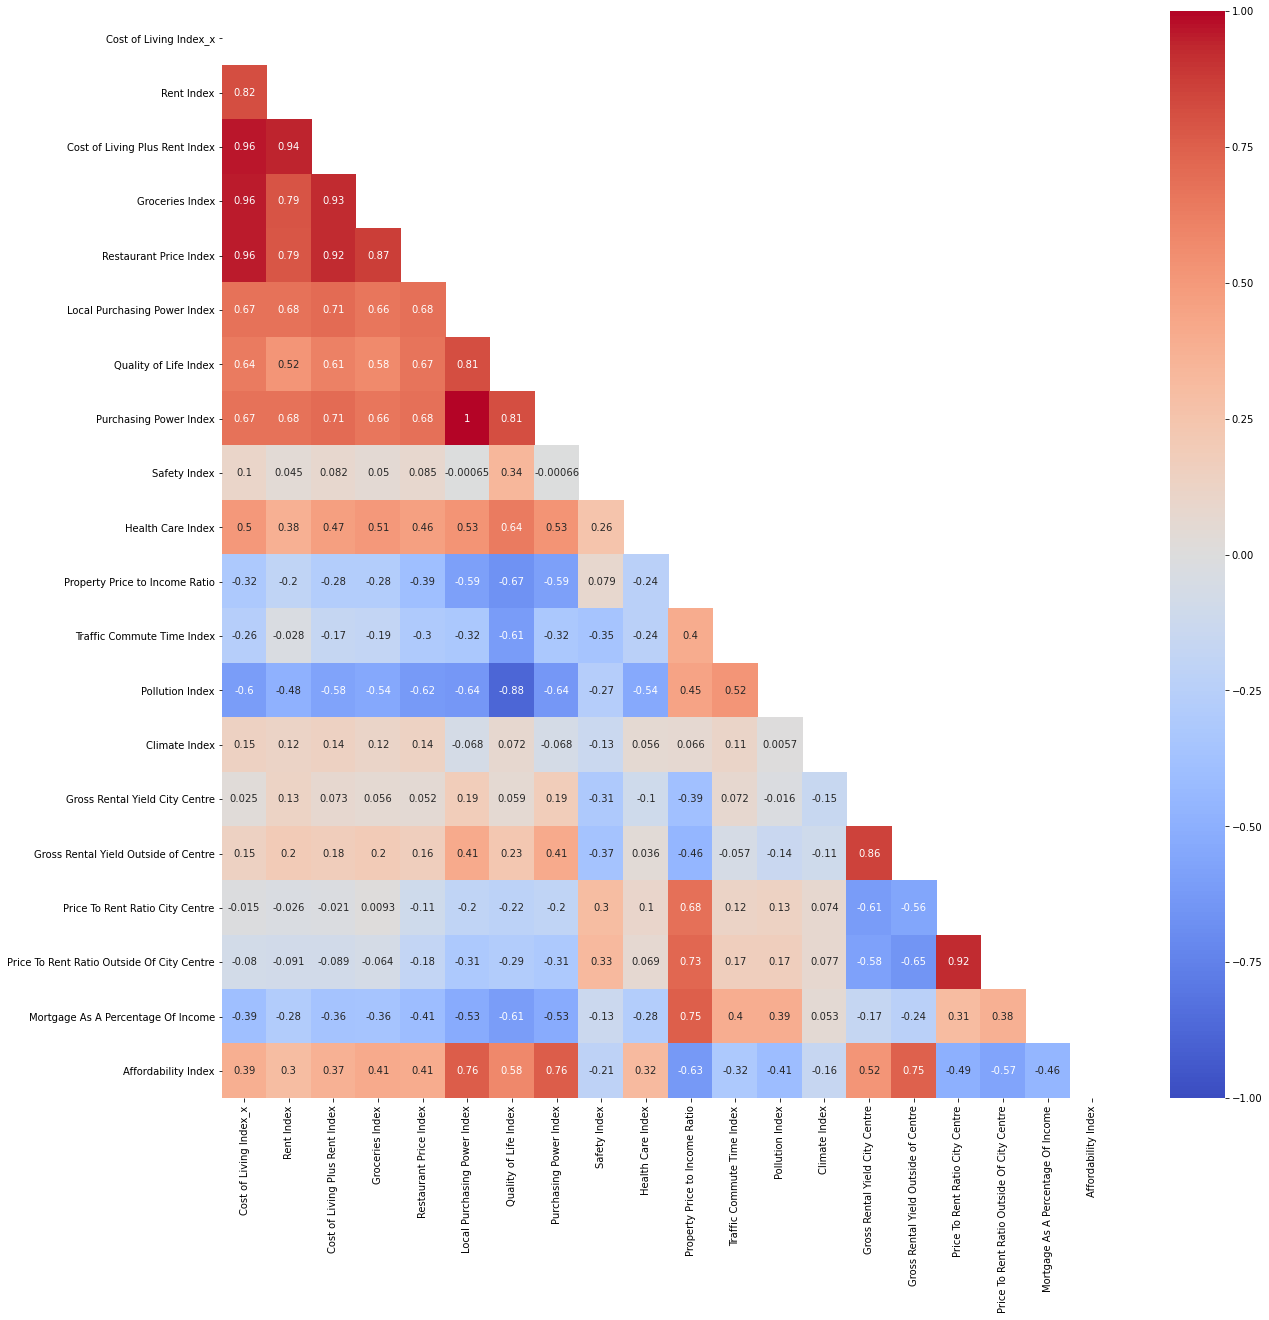

In [31]:
# Veiwing correlations with heatmap
plt.figure(figsize=(20,20))

# creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

On the above correlation heat map, it is found that  purchasing power, restaurant and grocery costs are highly correlated with cost of living . This make sense as they all would contribute to cost of living expenses. Healthcare quality is positivley correlated with quality of life. Pollution is highly negatively correlated with quality of life. Again, these are common sense correlations. 

# Sorting by specific variables
I want to see which cities hold the top place in some of these attributes, and which come in last! I will sort the data by specified column.

In [34]:
# veiwing all the column names again
full_data.columns

Index(['City', 'Cost of Living Index_x', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Property Price to Income Ratio',
       'Traffic Commute Time Index', 'Pollution Index', 'Climate Index',
       'Gross Rental Yield City Centre',
       'Gross Rental Yield Outside of Centre',
       'Price To Rent Ratio City Centre',
       'Price To Rent Ratio Outside Of City Centre',
       'Mortgage As A Percentage Of Income', 'Affordability Index'],
      dtype='object')

In [35]:
# veiwing most expensive cities to live
full_data.sort_values(by="Cost of Living Index_x", ascending=False).head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Property Price to Income Ratio  \
0                  112.94         83.72  ...                            8.22   
1                   14.63         52.79  ...                           17.85   
2                  106.34         72.48  ...                            9.44   
3                   70.16         55.63  ...                            8.70   
4                   81.05         65.32  ...                           10.63   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                       34.93            18.00          81.48   
1                       39.82            93.51          94.74   
2                       25.49            25.49          82.61   
3                       41.19            36.66          95.33   
4                       31.21            23.72          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85  
3                               62.36                 1.60  
4                               67.97                 1.47  

[5 rows x 21 columns]

In [36]:
# veiwing least expensive cities to live
full_data.sort_values(by="Cost of Living Index_x").head(5)

City  Cost of Living Index_x  Rent Index  \
231     Lahore, Pakistan                   21.63        4.36   
230    Karachi, Pakistan                   21.68        4.92   
229  Islamabad, Pakistan                   22.45        6.28   
228    Coimbatore, India                   23.75        5.07   
227     Mangalore, India                   24.16        4.95   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
231                           13.67            18.96                   19.01   
230                           13.96            18.83                   16.49   
229                           14.99            19.36                   18.62   
228                           15.13            26.98                   15.08   
227                           15.31            27.64                   14.63   

     Local Purchasing Power Index  Quality of Life Index  \
231                         23.88                 102.72   
230                         28.31                  83.92   
229                         29.40                 140.95   
228                         39.02                 121.89   
227                         43.13                 152.32   

     Purchasing Power Index  Safety Index  ...  \
231                   23.88         61.04  ...   
230                   28.31         46.64  ...   
229                   29.40         70.50  ...   
228                   39.02         60.18  ...   
227                   43.13         74.85  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
231                           13.98                       33.78   
230                           14.15                       42.30   
229                            9.72                       35.05   
228                            9.99                       47.50   
227                            7.85                       31.84   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
231            78.77          67.56                            4.13   
230            89.94          71.32                            3.61   
229            41.86          76.91                            6.07   
228            63.10          78.10                            3.83   
227            44.49          66.65                            4.25   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
231                                  4.30                            24.20   
230                                  4.42                            27.67   
229                                  7.22                            16.48   
228                                  3.88                            26.10   
227                                  4.23                            23.53   

     Price To Rent Ratio Outside Of City Centre  \
231                                       23.27   
230                                       22.61   
229                                       13.86   
228                                       25.74   
227                                       23.62   

     Mortgage As A Percentage Of Income  Affordability Index  
231                              221.22                 0.45  
230                              186.94                 0.53  
229                              136.21                 0.73  
228                              109.78                 0.91  
227                               80.85                 1.24  

[5 rows x 21 columns]

In [37]:
# veiwing most expensive cities to buy groceries
full_data.sort_values(by="Groceries Index", ascending=False).head(5)

City  Cost of Living Index_x  Rent Index  \
1              Beirut, Lebanon                  128.71       30.47   
0          Zurich, Switzerland                  129.76       71.87   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
6  New York, NY, United States                  100.00      100.00   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
1                           83.41           150.94                  124.52   
0                          103.06           131.68                  133.26   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
6                          100.00           100.00                  100.00   

   Local Purchasing Power Index  Quality of Life Index  \
1                         14.63                  76.83   
0                        112.94                 193.31   
2                        106.34                 184.17   
3                         70.16                 152.70   
6                        100.00                 138.17   

   Purchasing Power Index  Safety Index  ...  Property Price to Income Ratio  \
1                   14.63         52.79  ...                           17.85   
0                  112.94         83.72  ...                            8.22   
2                  106.34         72.48  ...                            9.44   
3                   70.16         55.63  ...                            8.70   
6                  100.00         52.75  ...                            9.41   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
1                       39.82            93.51          94.74   
0                       34.93            18.00          81.48   
2                       25.49            25.49          82.61   
3                       41.19            36.66          95.33   
6                       42.79            58.04          79.66   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
1                            5.94                                  7.10   
0                            3.29                                  3.67   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
6                            4.53                                  5.33   

   Price To Rent Ratio City Centre  \
1                            16.84   
0                            30.39   
2                            30.51   
3                            18.67   
6                            22.09   

   Price To Rent Ratio Outside Of City Centre  \
1                                       14.08   
0                                       27.27   
2                                       28.89   
3                                       15.93   
6                                       18.76   

   Mortgage As A Percentage Of Income  Affordability Index  
1                              182.48                 0.55  
0                               46.21                 2.16  
2                               54.08                 1.85  
3                               62.36                 1.60  
6                               65.39                 1.53  

[5 rows x 21 columns]

In [38]:
# veiwing least expensive cities to buy groceries
full_data.sort_values(by="Groceries Index").head(5)

City  Cost of Living Index_x  Rent Index  \
230    Karachi, Pakistan                   21.68        4.92   
231     Lahore, Pakistan                   21.63        4.36   
229  Islamabad, Pakistan                   22.45        6.28   
219     Bogota, Colombia                   29.12       12.70   
217     Tbilisi, Georgia                   29.60       10.05   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
230                           13.96            18.83                   16.49   
231                           13.67            18.96                   19.01   
229                           14.99            19.36                   18.62   
219                           21.55            24.73                   23.24   
217                           20.58            25.12                   27.19   

     Local Purchasing Power Index  Quality of Life Index  \
230                         28.31                  83.92   
231                         23.88                 102.72   
229                         29.40                 140.95   
219                         23.40                  86.42   
217                         27.19                 113.39   

     Purchasing Power Index  Safety Index  ...  \
230                   28.31         46.64  ...   
231                   23.88         61.04  ...   
229                   29.40         70.50  ...   
219                   23.40         35.60  ...   
217                   27.19         75.85  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
230                           14.15                       42.30   
231                           13.98                       33.78   
229                            9.72                       35.05   
219                           23.35                       51.53   
217                           13.67                       37.57   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
230            89.94          71.32                            3.61   
231            78.77          67.56                            4.13   
229            41.86          76.91                            6.07   
219            70.31          97.12                            5.07   
217            74.46          84.20                            5.63   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
230                                  4.42                            27.67   
231                                  4.30                            24.20   
229                                  7.22                            16.48   
219                                  4.75                            19.70   
217                                  6.33                            17.75   

     Price To Rent Ratio Outside Of City Centre  \
230                                       22.61   
231                                       23.27   
229                                       13.86   
219                                       21.03   
217                                       15.80   

     Mortgage As A Percentage Of Income  Affordability Index  
230                              186.94                 0.53  
231                              221.22                 0.45  
229                              136.21                 0.73  
219                              298.75                 0.33  
217                              167.53                 0.60  

[5 rows x 21 columns]

In [39]:
# veiwing the safest cities
full_data.sort_values(by="Safety Index", ascending=False).head(5)

City  Cost of Living Index_x  Rent Index  \
120                      Doha, Qatar                   61.18       50.48   
124  Abu Dhabi, United Arab Emirates                   58.97       46.72   
108                   Taipei, Taiwan                   65.43       27.38   
143    Sharjah, United Arab Emirates                   50.68       22.87   
0                Zurich, Switzerland                  129.76       71.87   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
120                           56.25            53.26                   62.04   
124                           53.32            49.78                   58.71   
108                           47.88            79.41                   33.42   
143                           37.86            41.47                   38.64   
0                            103.06           131.68                  133.26   

     Local Purchasing Power Index  Quality of Life Index  \
120                         79.27                 148.83   
124                         98.10                 173.49   
108                         55.00                 141.37   
143                         76.09                 143.42   
0                          112.94                 193.31   

     Purchasing Power Index  Safety Index  ...  \
120                   79.27         88.20  ...   
124                   98.10         87.96  ...   
108                   55.00         86.53  ...   
143                   76.09         85.52  ...   
0                    112.94         83.72  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
120                            6.67                       30.62   
124                            4.29                       26.47   
108                           30.66                       33.90   
143                            4.15                       54.74   
0                              8.22                       34.93   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
120            60.44          36.03                            8.22   
124            44.52          43.89                            9.67   
108            49.15          84.38                            1.48   
143            48.04          43.35                            8.46   
0              18.00          81.48                            3.29   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
120                                  7.02                            12.17   
124                                  8.68                            10.34   
108                                  1.51                            67.79   
143                                  8.89                            11.82   
0                                    3.67                            30.39   

     Price To Rent Ratio Outside Of City Centre  \
120                                       14.24   
124                                       11.53   
108                                       66.03   
143                                       11.24   
0                                         27.27   

     Mortgage As A Percentage Of Income  Affordability Index  
120                               50.34                 1.99  
124                               30.67                 3.26  
108                              179.21                 0.56  
143                               31.01                 3.23  
0                                 46.21                 2.16  

[5 rows x 21 columns]

In [40]:
# veiwing the least safest cities
full_data.sort_values(by="Safety Index").head(5)

City  Cost of Living Index_x  Rent Index  \
154            Caracas, Venezuela                   46.27       12.01   
153    Johannesburg, South Africa                   46.66       18.00   
176        Rio de Janeiro, Brazil                   38.81       12.42   
74   Baltimore, MD, United States                   72.04       43.89   
92     Detroit, MI, United States                   68.97       40.45   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
154                           30.47            37.40                   49.51   
153                           33.44            37.01                   44.08   
176                           26.64            33.31                   31.16   
74                            59.06            69.44                   75.01   
92                            55.82            65.67                   68.09   

     Local Purchasing Power Index  Quality of Life Index  \
154                         14.54                  74.17   
153                         64.31                 120.51   
176                         20.96                  68.69   
74                         119.88                 160.37   
92                          98.85                 127.32   

     Purchasing Power Index  Safety Index  ...  \
154                   14.54         15.47  ...   
153                   64.33         19.28  ...   
176                   20.96         22.33  ...   
74                   119.88         25.45  ...   
92                    98.85         25.72  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
154                           16.62                       35.61   
153                            3.48                       40.72   
176                           23.50                       51.40   
74                             2.05                       30.93   
92                             1.48                       45.09   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
154            73.63          99.93                            7.52   
153            61.31          91.38                           10.22   
176            67.40          88.22                            4.25   
74             50.38          81.24                           11.26   
92             60.58          66.03                           20.53   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
154                                  7.61                            13.30   
153                                 11.39                             9.78   
176                                  3.99                            23.51   
74                                  21.20                             8.88   
92                                  29.89                             4.87   

     Price To Rent Ratio Outside Of City Centre  \
154                                       13.14   
153                                        8.78   
176                                       25.06   
74                                         4.72   
92                                         3.35   

     Mortgage As A Percentage Of Income  Affordability Index  
154                              395.15                 0.25  
153                               35.05                 2.85  
176                              253.59                 0.39  
74                                14.47                 6.91  
92                                10.35                 9.66  

[5 rows x 21 columns]

In [41]:
# veiwing the most polluted cities
full_data.sort_values(by="Pollution Index", ascending=False).head(5)

City  Cost of Living Index_x  Rent Index  \
215           Kathmandu, Nepal                   30.48        4.93   
1              Beirut, Lebanon                  128.71       30.47   
193          Dhaka, Bangladesh                   35.60        6.51   
177  Ho Chi Minh City, Vietnam                   38.41       18.51   
216               Noida, India                   29.72        6.72   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
215                           18.70            28.92                   23.09   
1                             83.41           150.94                  124.52   
193                           22.19            31.54                   24.26   
177                           29.24            38.92                   20.61   
216                           19.12            29.72                   23.57   

     Local Purchasing Power Index  Quality of Life Index  \
215                         20.53                  88.74   
1                           14.63                  76.83   
193                         21.09                  52.62   
177                         27.60                  69.70   
216                         51.91                  93.56   

     Purchasing Power Index  Safety Index  ...  \
215                   20.53         64.18  ...   
1                     14.63         52.79  ...   
193                   21.09         35.19  ...   
177                   27.60         46.39  ...   
216                   51.91         41.17  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
215                           19.98                       36.87   
1                             17.85                       39.82   
193                           18.12                       58.62   
177                           28.08                       31.79   
216                            7.03                       44.96   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
215            95.53          92.64                            2.47   
1              93.51          94.74                            5.94   
193            93.26          71.29                            3.16   
177            92.48          63.44                            3.11   
216            92.48          58.90                            4.26   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
215                                  3.66                            40.47   
1                                    7.10                            16.84   
193                                  3.42                            31.67   
177                                  4.98                            32.14   
216                                  4.22                            23.48   

     Price To Rent Ratio Outside Of City Centre  \
215                                       27.32   
1                                         14.08   
193                                       29.26   
177                                       20.09   
216                                       23.68   

     Mortgage As A Percentage Of Income  Affordability Index  
215                              250.65                 0.40  
1                                182.48                 0.55  
193                              198.22                 0.50  
177                              308.33                 0.32  
216                               73.23                 1.37  

[5 rows x 21 columns]

In [42]:
# veiwing the least polluted cities
full_data.sort_values(by="Pollution Index").head(5)

City  Cost of Living Index_x  Rent Index  \
33        Helsinki, Finland                   79.29       40.74   
47      Canberra, Australia                   77.10       43.75   
45  Wellington, New Zealand                   77.68       47.11   
63         Victoria, Canada                   74.45       44.39   
5        Reykjavik, Iceland                  101.04       51.64   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
33                           61.52            70.34                   89.49   
47                           61.72            78.83                   75.40   
45                           63.58            76.88                   68.19   
63                           60.59            78.10                   73.84   
5                            78.26            95.81                  111.77   

    Local Purchasing Power Index  Quality of Life Index  \
33                         74.66                 172.99   
47                         95.62                 203.35   
45                         86.88                 195.87   
63                         81.89                 183.75   
5                          69.26                 179.67   

    Purchasing Power Index  Safety Index  ...  Property Price to Income Ratio  \
33                   74.66         73.99  ...                           13.55   
47                   95.62         77.71  ...                            5.34   
45                   86.88         71.45  ...                            6.36   
63                   81.89         64.04  ...                            8.40   
5                    69.26         77.77  ...                            6.50   

    Traffic Commute Time Index  Pollution Index  Climate Index  \
33                       30.86            13.11          62.79   
47                       24.09            13.52          82.72   
45                       27.74            13.69          97.68   
63                       28.47            14.62          92.52   
5                        19.96            15.01          68.81   

    Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
33                            2.65                                  3.58   
47                            6.23                                  6.89   
45                            5.67                                  7.16   
63                            4.18                                  6.25   
5                             6.55                                  7.31   

    Price To Rent Ratio City Centre  \
33                            37.72   
47                            16.06   
45                            17.64   
63                            23.91   
5                             15.27   

    Price To Rent Ratio Outside Of City Centre  \
33                                       27.97   
47                                       14.52   
45                                       13.97   
63                                       15.99   
5                                        13.68   

    Mortgage As A Percentage Of Income  Affordability Index  
33                               75.88                 1.32  
47                               35.90                 2.79  
45                               48.56                 2.06  
63                               55.94                 1.79  
5                                51.70                 1.93  

[5 rows x 21 columns]

In [43]:
# veiwing the cities with the best quality healthcare
full_data.sort_values(by="Health Care Index", ascending=False).head(5)

City  Cost of Living Index_x  Rent Index  \
108           Taipei, Taiwan                   65.43       27.38   
163     Chiang Mai, Thailand                   42.49       13.68   
90   Glasgow, United Kingdom                   69.25       28.52   
35        Seoul, South Korea                   79.18       36.12   
31       Brisbane, Australia                   79.72       38.85   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
108                           47.88            79.41                   33.42   
163                           29.21            47.92                   22.40   
90                            50.47            55.27                   82.57   
35                            59.32            98.31                   45.60   
31                            60.88            79.03                   77.05   

     Local Purchasing Power Index  Quality of Life Index  \
108                         55.00                 141.37   
163                         28.67                 123.83   
90                          81.16                 164.53   
35                          71.31                 123.32   
31                          92.05                 185.65   

     Purchasing Power Index  Safety Index  ...  \
108                   55.00         86.53  ...   
163                   28.67         76.30  ...   
90                    81.16         54.53  ...   
35                    71.31         73.59  ...   
31                    92.05         65.69  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
108                           30.66                       33.90   
163                           16.11                       25.75   
90                            10.27                       33.26   
35                            29.49                       42.14   
31                             6.67                       39.88   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
108            49.15          84.38                            1.48   
163            77.08          75.93                            4.52   
90             34.52          84.78                            2.42   
35             58.75          68.39                            1.15   
31             22.38          98.07                            5.05   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
108                                  1.51                            67.79   
163                                  4.80                            22.11   
90                                   5.44                            41.36   
35                                   1.46                            86.68   
31                                   4.60                            19.80   

     Price To Rent Ratio Outside Of City Centre  \
108                                       66.03   
163                                       20.83   
90                                        18.39   
35                                        68.40   
31                                        21.75   

     Mortgage As A Percentage Of Income  Affordability Index  
108                              179.21                 0.56  
163                              120.65                 0.83  
90                                70.58                 1.42  
35                               196.24                 0.51  
31                                46.08                 2.17  

[5 rows x 21 columns]

In [44]:
# veiwing the cities with the lowest quality healthcare
full_data.sort_values(by="Health Care Index").head(5)

City  Cost of Living Index_x  Rent Index  \
154      Caracas, Venezuela                   46.27       12.01   
193       Dhaka, Bangladesh                   35.60        6.51   
208        Baku, Azerbaijan                   31.17       10.36   
176  Rio de Janeiro, Brazil                   38.81       12.42   
182     Casablanca, Morocco                   37.75       14.22   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
154                           30.47            37.40                   49.51   
193                           22.19            31.54                   24.26   
208                           21.58            26.77                   29.77   
176                           26.64            33.31                   31.16   
182                           26.90            32.50                   26.86   

     Local Purchasing Power Index  Quality of Life Index  \
154                         14.54                  74.17   
193                         21.09                  52.62   
208                         24.89                 102.47   
176                         20.96                  68.69   
182                         30.04                  86.92   

     Purchasing Power Index  Safety Index  ...  \
154                   14.54         15.47  ...   
193                   21.09         35.19  ...   
208                   24.89         69.22  ...   
176                   20.96         22.33  ...   
182                   30.04         44.42  ...   

     Property Price to Income Ratio  Traffic Commute Time Index  \
154                           16.62                       35.61   
193                           18.12                       58.62   
208                           17.74                       37.69   
176                           23.50                       51.40   
182                           15.25                       48.09   

     Pollution Index  Climate Index  Gross Rental Yield City Centre  \
154            73.63          99.93                            7.52   
193            93.26          71.29                            3.16   
208            75.84          91.40                            4.57   
176            67.40          88.22                            4.25   
182            82.15          98.08                            5.24   

     Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
154                                  7.61                            13.30   
193                                  3.42                            31.67   
208                                  5.33                            21.88   
176                                  3.99                            23.51   
182                                  5.34                            19.09   

     Price To Rent Ratio Outside Of City Centre  \
154                                       13.14   
193                                       29.26   
208                                       18.77   
176                                       25.06   
182                                       18.72   

     Mortgage As A Percentage Of Income  Affordability Index  
154                              395.15                 0.25  
193                              198.22                 0.50  
208                              192.07                 0.52  
176                              253.59                 0.39  
182                              120.90                 0.83  

[5 rows x 21 columns]

Wow, very interesting stuff!

# Prepping the data for modeling

### Making a copy of the data

In [47]:
# making a copy of the data
data = full_data.copy()

In [48]:
# Veiwing copy
data.head()

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Property Price to Income Ratio  \
0                  112.94         83.72  ...                            8.22   
1                   14.63         52.79  ...                           17.85   
2                  106.34         72.48  ...                            9.44   
3                   70.16         55.63  ...                            8.70   
4                   81.05         65.32  ...                           10.63   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                       34.93            18.00          81.48   
1                       39.82            93.51          94.74   
2                       25.49            25.49          82.61   
3                       41.19            36.66          95.33   
4                       31.21            23.72          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85  
3                               62.36                 1.60  
4                               67.97                 1.47  

[5 rows x 21 columns]

In [49]:
# Denoting X & y
X = data.drop(columns='City')
y = data['City']

In [50]:
# veiwing X
X.head(3)

Cost of Living Index_x  Rent Index  Cost of Living Plus Rent Index  \
0                  129.76       71.87                          103.06   
1                  128.71       30.47                           83.41   
2                  120.88       72.95                           98.78   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0           131.68                  133.26                        112.94   
1           150.94                  124.52                         14.63   
2           120.73                  125.98                        106.34   

   Quality of Life Index  Purchasing Power Index  Safety Index  \
0                 193.31                  112.94         83.72   
1                  76.83                   14.63         52.79   
2                 184.17                  106.34         72.48   

   Health Care Index  Property Price to Income Ratio  \
0              74.43                            8.22   
1              64.94                           17.85   
2              72.80                            9.44   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                       34.93            18.00          81.48   
1                       39.82            93.51          94.74   
2                       25.49            25.49          82.61   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   

   Mortgage As A Percentage Of Income  Affordability Index  
0                               46.21                 2.16  
1                              182.48                 0.55  
2                               54.08                 1.85

In [51]:
# veiwing y
y.head(3)

0    Zurich, Switzerland
1        Beirut, Lebanon
2    Geneva, Switzerland
Name: City, dtype: object

## Scaling the data
The unsupervised learning models I will use are distance based models. Because of this, the scale of data can have a great impact on performance of the model. If the features lie in widely different scales, then the impact of some features will be washed away. Because of this, it is recommended to scale the data prior to passing it into the following unsupervised learning models.

In [57]:
# instantiate scaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [53]:
# Put back into DF
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Veiw scaled data
X_scaled.head()

Cost of Living Index_x  Rent Index  Cost of Living Plus Rent Index  \
0                3.324002    2.031760                        2.882383   
1                3.274431   -0.060791                        1.879426   
2                2.904776    2.086348                        2.663928   
3                2.122977    1.799760                        2.074913   
4                2.034694    0.837388                        1.575221   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0         3.445428                3.109234                      1.329502   
1         4.308320                2.756478                     -1.598364   
2         2.954843                2.815406                      1.132941   
3         2.792211                1.387837                      0.055429   
4         1.912742                2.220888                      0.379755   

   Quality of Life Index  Purchasing Power Index  Safety Index  \
0               1.522775                1.329499      1.821321   
1              -1.745540               -1.598375     -0.292074   
2               1.266316                1.132938      1.053311   
3               0.383298                0.055423     -0.098022   
4               0.685214                0.379750      0.564080   

   Health Care Index  Property Price to Income Ratio  \
0           0.783588                       -0.369220   
1          -0.200907                        0.775737   
2           0.614491                       -0.224168   
3           0.637314                       -0.312150   
4           1.017003                       -0.082683   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                   -0.143544        -1.556220       0.265832   
1                    0.400970         2.030012       1.044584   
2                   -1.194712        -1.200494       0.332196   
3                    0.553523        -0.669992       1.079235   
4                   -0.557775        -1.284557      -0.996264   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                       -0.624160                             -0.619610   
1                        0.124136                              0.003075   
2                       -0.626984                             -0.657734   
3                       -0.039642                             -0.145788   
4                       -0.677812                             -0.583302   

   Price To Rent Ratio City Centre  \
0                         0.642891   
1                        -0.508586   
2                         0.653088   
3                        -0.353073   
4                         0.804352   

   Price To Rent Ratio Outside Of City Centre  \
0                                    0.672470   
1                                   -0.512169   
2                                    0.817968   
3                                   -0.346014   
4                                    0.542241   

   Mortgage As A Percentage Of Income  Affordability Index  
0                           -0.445590             0.088438  
1                            0.525488            -0.791277  
2                           -0.389507            -0.080948  
3                           -0.330503            -0.217550  
4                           -0.290525            -0.288583

<ipython-input-54-15a99b519fed>:11: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


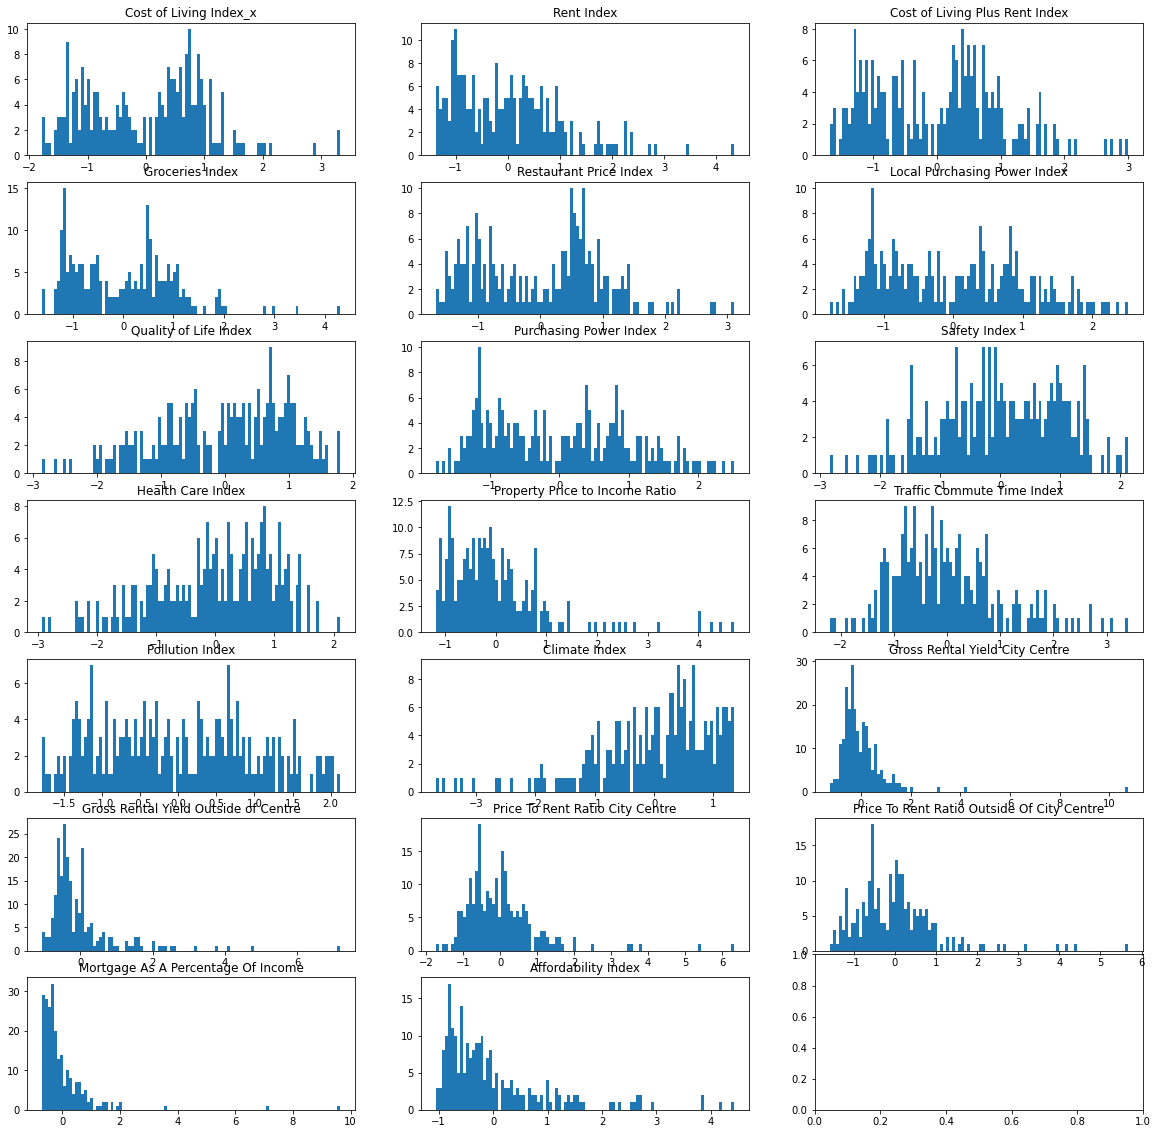

In [54]:
# Checking distributions after scaling
plt.subplots(6, 3, figsize=(20, 20))

for index, column in enumerate(X_scaled):
    
    # Visualize the distribution
    plt.subplot(7, 3, index+1)
    plt.hist(X_scaled[column], bins=100)
    plt.title(column)

plt.tight_layout()
plt.show()

In [55]:
# checking stats summary after scaling
X_scaled.describe()

Cost of Living Index_x    Rent Index  Cost of Living Plus Rent Index  \
count            2.320000e+02  2.320000e+02                    2.320000e+02   
mean             7.465293e-17  2.402293e-16                    2.928692e-16   
std              1.002162e+00  1.002162e+00                    1.002162e+00   
min             -1.780826e+00 -1.380513e+00                   -1.680181e+00   
25%             -9.141666e-01 -8.662208e-01                   -9.012935e-01   
50%              2.104960e-01 -8.378874e-02                    1.483668e-01   
75%              7.384229e-01  5.726606e-01                    6.624783e-01   
max              3.324002e+00  4.343675e+00                    2.997226e+00   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count     2.320000e+02            2.320000e+02                  2.320000e+02   
mean     -1.339924e-16           -2.306584e-16                  1.148507e-16   
std       1.002162e+00            1.002162e+00                  1.002162e+00   
min      -1.610509e+00           -1.678791e+00                 -1.776758e+00   
25%      -8.787754e-01           -9.507798e-01                 -8.726518e-01   
50%       2.723863e-02            1.762001e-01                 -6.876171e-02   
75%       6.841520e-01            6.966551e-01                  7.929054e-01   
max       4.308320e+00            3.109234e+00                  2.518994e+00   

       Quality of Life Index  Purchasing Power Index  Safety Index  \
count           2.320000e+02            2.320000e+02  2.320000e+02   
mean           -2.277871e-16            1.818469e-17 -3.184713e-16   
std             1.002162e+00            1.002162e+00  1.002162e+00   
min            -2.860325e+00           -1.776770e+00 -2.842088e+00   
25%            -7.173871e-01           -8.726606e-01 -7.165640e-01   
50%             1.571426e-01           -6.847050e-02  8.912136e-03   
75%             7.996242e-01            7.929012e-01  8.348310e-01   
max             1.804488e+00            2.518995e+00  2.127432e+00   

       Health Care Index  Property Price to Income Ratio  \
count       2.320000e+02                    2.320000e+02   
mean        2.777950e-16                    4.498317e-17   
std         1.002162e+00                    1.002162e+00   
min        -2.932388e+00                   -1.181271e+00   
25%        -7.400971e-01                   -6.429748e-01   
50%         1.237997e-01                   -2.027669e-01   
75%         7.879965e-01                    3.156144e-01   
max         2.112500e+00                    4.704021e+00   

       Traffic Commute Time Index  Pollution Index  Climate Index  \
count                2.320000e+02     2.320000e+02   2.320000e+02   
mean                -4.639488e-16    -2.268300e-16   3.823570e-16   
std                  1.002162e+00     1.002162e+00   1.002162e+00   
min                 -2.205793e+00    -1.788463e+00  -3.680787e+00   
25%                 -7.108851e-01    -8.229207e-01  -5.784040e-01   
50%                 -1.290681e-01    -8.131006e-02   2.467447e-01   
75%                  5.713392e-01     7.308284e-01   6.866282e-01   
max                  3.403034e+00     2.125949e+00   1.349390e+00   

       Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
count                    2.320000e+02                          2.320000e+02   
mean                    -1.112616e-16                          4.115482e-17   
std                      1.002162e+00                          1.002162e+00   
min                     -1.262330e+00                         -1.066201e+00   
25%                     -5.246228e-01                         -5.370091e-01   
50%                     -2.260103e-01                         -3.264216e-01   
75%                      2.893258e-01                          8.204556e-02   
max                      1.074994e+01                          7.199359e+00   

       Price To Rent Ratio City Centre  \
count                     

In [56]:
# Checking std after scaling
X_scaled.std()

Cost of Living Index_x                        1.002162
Rent Index                                    1.002162
Cost of Living Plus Rent Index                1.002162
Groceries Index                               1.002162
Restaurant Price Index                        1.002162
Local Purchasing Power Index                  1.002162
Quality of Life Index                         1.002162
Purchasing Power Index                        1.002162
Safety Index                                  1.002162
Health Care Index                             1.002162
Property Price to Income Ratio                1.002162
Traffic Commute Time Index                    1.002162
Pollution Index                               1.002162
Climate Index                                 1.002162
Gross Rental Yield City Centre                1.002162
Gross Rental Yield Outside of Centre          1.002162
Price To Rent Ratio City Centre               1.002162
Price To Rent Ratio Outside Of City Centre    1.002162
Mortgage A

Looking good!

# Modeling with Unsupervised Learning Models
It is worth noting that unlike for supervised problems, the concept of overfitting does not apply to unsupervised learning since there is no ground truth (target). As such, there is no need to perform a train/validation/test split nor to apply cross-validation. The model is fit on the entire dataset and used to assign cluster labels to all data points.

## K Means Model
The model will fit  𝐾  special points to the data which will serve as cluster centers (specified by the `n_clusters` argument). Each of these special points represents a distinct cluster. When making a prediction for the label of a data point 𝑥 , it is assigned to the same label as the nearest center. I can read off the cluster centers using the `cluster_centers_` attribute.

The K-means model is minimizing the sum of squared distances between each point and its assigned cluster center. The goal is to minimize this total distance. Actually finding the centers which minimize the distance is very hard. Instead, there are several heuristic approaches which seem to do well in practice. 

**Minimizing Inertia**
The actual distance score of our fit is stored in the inertia_ variable. Note that inertia is not a normalized score. Closer to zero is better (with zero being the smallest possible value). Each dataset will have its own optimal inertia.

**Maximizing Silhouette Score**
The silhouette score measures how similar the points are to their assigned clusters, relative to the other clusters they are not assigned to. The silhouette score for the entire data set is the mean of all the individual silhoutte scores. A greater silhouette score (closer to 1) means the clusters are well separated and closer on average to points in their cluster than others. The worst score is -1.0. Most scores are between 1.0 and 0.0.

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Look over a range of K values
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []
inertia_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(X_scaled)
    
    # Get inertia
    inertia_scores.append(k_means_model.inertia_)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(X_scaled)
    silhouette = silhouette_score(X_scaled, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

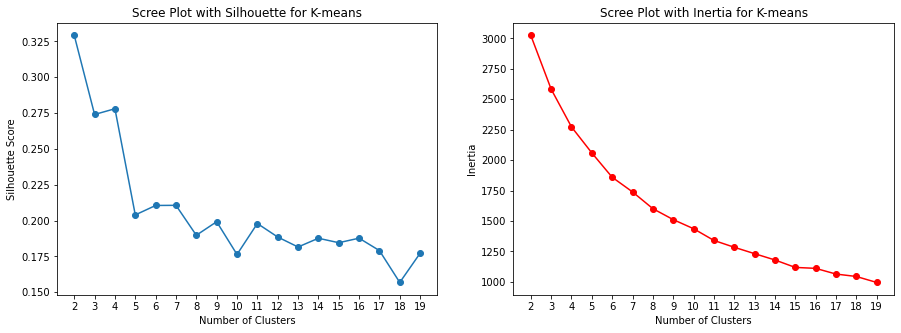

In [60]:
# plot the inertia 
plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Scree Plot with Silhouette for K-means')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_scores, marker="o", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot with Inertia for K-means')
plt.xticks(k_range)
plt.savefig('screeplot.png', dpi=300, bbox_inches='tight')
plt.show();


When finding the ideal k, the goal is to minimize inertia and maximize silhouette score. Here, k=4 seems to be the ideal number of clusters, considering both of these measures. While not very scientific, these measures can be a nice approximation. Drawing the cutoff is hard to determine and typically relies on subjective judgment and further investigation. I will move forward with k=4.

### K Means Model where k = 4

In [61]:
# Instantiate K Means Model (kmm) with 4 clusters
kmm4 = KMeans(n_clusters=4)

# Fit the model
kmm4.fit(X_scaled)

# Get the labels
kmm4_clusters = kmm4.predict(X_scaled)

### Creating dataframes to hold the cluster labels

In [62]:
# creating a df for KMeans k=4 cluster labels
kmm4_df = data.copy()
kmm4_df['Cluster Labels'] = kmm4_clusters
kmm4_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               1  
1                              182.48                 0.55               1  
2                               54.08                 1.85               1  
3                               62.36                 1.60               1  
4                               67.97                 1.47               1  

[5 rows x 22 columns]

In [63]:
# checking how many labels in this df
kmm4_df['Cluster Labels'].value_counts()

3    94
1    83
0    42
2    13
Name: Cluster Labels, dtype: int64

In [64]:
# Creating a df that will hold ALL the cluster labels from each clustering algorithm
data_all_labels = data.copy()
data_all_labels['KMM_4'] = kmm4_clusters
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  
0                               46.21                 2.16      1  
1                              182.48                 0.55      1  
2                               54.08                 1.85      1  
3                               62.36                 1.60      1  
4                               67.97                 1.47      1  

[5 rows x 22 columns]

### Looking deeper into the 4 groups

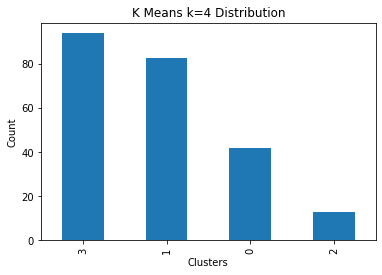

<Figure size 432x288 with 0 Axes>

In [65]:
# Seeing how the clusters are distributed
kmm4_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.title('K Means k=4 Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()
# save the figure
plt.savefig('kmm4_dist.png', dpi=300, bbox_inches='tight')

In [66]:
# looking at cluster 0
kmm4_df.loc[kmm4_df['Cluster Labels'] == 0]

City  Cost of Living Index_x  Rent Index  \
10       Anchorage, AK, United States                   91.78       37.92   
27     Minneapolis, MN, United States                   80.92       47.28   
34    Philadelphia, PA, United States                   79.24       48.97   
38      Pittsburgh, PA, United States                   78.49       39.97   
42         Chicago, IL, United States                   78.14       59.69   
50         Atlanta, GA, United States                   76.30       50.46   
54           Tampa, FL, United States                   75.28       44.40   
57       Cleveland, OH, United States                   75.12       36.74   
64          Denver, CO, United States                   74.26       56.21   
66       Milwaukee, WI, United States                   73.83       39.44   
67         Buffalo, NY, United States                   73.83       29.48   
73                   Edmonton, Canada                   72.28       29.95   
74       Baltimore, MD, United States                   72.04       43.89   
75       Nashville, TN, United States                   71.79       53.89   
76                    Calgary, Canada                   71.52       33.82   
80       Charlotte, NC, United States                   70.97       49.97   
85        Columbus, OH, United States                   70.27       36.61   
86                   Winnipeg, Canada                   69.85       27.91   
87    Jacksonville, FL, United States                   69.37       36.33   
89         Phoenix, AZ, United States                   69.25       42.91   
92         Detroit, MI, United States                   68.97       40.45   
96                     Regina, Canada                   68.15       27.31   
97       Las Vegas, NV, United States                   68.10       38.05   
99         Orlando, FL, United States                   67.57       42.72   
101        Madison, WI, United States                   67.17       38.29   
102    Kansas City, MO, United States                   67.08       33.07   
103         Dallas, TX, United States                   67.05       49.95   
104        Raleigh, NC, United States                   67.01       39.04   
105    Saint Louis, MO, United States                   66.71       33.92   
106       Richmond, VA, United States                   66.64       39.63   
109   Indianapolis, IN, United States                   65.27       32.24   
110  Oklahoma City, OK, United States                   65.02       31.73   
111         Austin, TX, United States                   64.33       56.22   
114     Cincinnati, OH, United States                   64.06       40.05   
115         Tucson, AZ, United States                   63.94       28.46   
116        Houston, TX, United States                   63.68       44.88   
117       Dubai, United Arab Emirates                   63.65       45.69   
118    San Antonio, TX, United States                   62.87       38.35   
119    Albuquerque, NM, United States                   61.34       30.41   
124   Abu Dhabi, United Arab Emirates                   58.97       46.72   
134              Riyadh, Saudi Arabia                   52.41       15.64   
188                    Lagos, Nigeria                   36.40       52.19   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
10                            66.95            96.21                   81.56   
27                            65.41            82.85                   79.09   
34                            65.28            81.85                   71.16   
38                            60.73            83.13                   61.79   
42                            69.63            72.89                   79.52   
50                            64.38            78.32                   68.54   
54                            61.04            80.58                   70.21   
57                            57.43            79.65                   68.18   
6

In [59]:
pd.set_option('display.max_rows', 150)

# looking at cluster 0 city names only
kmm4_df['City'].loc[kmm4_df['Cluster Labels'] == 0]

10         Anchorage, AK, United States
21        Washington, DC, United States
27       Minneapolis, MN, United States
36      Philadelphia, PA, United States
38             Miami, FL, United States
41        Pittsburgh, PA, United States
43           Chicago, IL, United States
45          Portland, OR, United States
48           Atlanta, GA, United States
50         Cleveland, OH, United States
55             Tampa, FL, United States
61         Milwaukee, WI, United States
65           Buffalo, NY, United States
67            Denver, CO, United States
69                       Ottawa, Canada
73         Baltimore, MD, United States
74                     Edmonton, Canada
75         Nashville, TN, United States
76                      Calgary, Canada
80                San Juan, Puerto Rico
81         Charlotte, NC, United States
84          Columbus, OH, United States
85                     Winnipeg, Canada
88           Phoenix, AZ, United States
91           Detroit, MI, United States


In [70]:
pd.set_option('display.max_rows', 150)

# looking at cluster 1 city names only
kmm4_df['City'].loc[kmm4_df['Cluster Labels'] == 1]

0                    Zurich, Switzerland
1                        Beirut, Lebanon
2                    Geneva, Switzerland
3            Honolulu, HI, United States
4                           Oslo, Norway
5                     Reykjavik, Iceland
6            New York, NY, United States
7       San Francisco, CA, United States
8                  Tel Aviv-Yafo, Israel
9                    Copenhagen, Denmark
11            Oakland, CA, United States
12             Boston, MA, United States
13            Seattle, WA, United States
14                London, United Kingdom
15                Luxembourg, Luxembourg
16                         Paris, France
17                          Tokyo, Japan
18                         Haifa, Israel
19                     Sydney, Australia
20                       Dublin, Ireland
21                Amsterdam, Netherlands
22         Washington, DC, United States
23                 Auckland, New Zealand
24                  Singapore, Singapore
25              

In [71]:
pd.set_option('display.max_rows', 150)

# looking at cluster 2 city names only
kmm4_df['City'].loc[kmm4_df['Cluster Labels'] == 2]

28        Hong Kong, Hong Kong
35          Seoul, South Korea
108             Taipei, Taiwan
136            Shanghai, China
137          Bangkok, Thailand
146            Shenzhen, China
155             Beijing, China
167        Manila, Philippines
187    Buenos Aires, Argentina
191               Tehran, Iran
206         Colombo, Sri Lanka
213              Mumbai, India
220               Delhi, India
Name: City, dtype: object

In [72]:
pd.set_option('display.max_rows', 150)

# looking at cluster 3 city names only
kmm4_df['City'].loc[kmm4_df['Cluster Labels'] == 3]

107                     Nicosia, Cyprus
122                Thessaloniki, Greece
125                      Athens, Greece
127                 Panama City, Panama
128                    Lisbon, Portugal
130                     Manama, Bahrain
131                 Montevideo, Uruguay
132                       Amman, Jordan
133                        Riga, Latvia
135                      Warsaw, Poland
138              Prague, Czech Republic
139       Jeddah (Jiddah), Saudi Arabia
140                      Gdansk, Poland
141                     Porto, Portugal
142                Bratislava, Slovakia
143       Sharjah, United Arab Emirates
145                     Zagreb, Croatia
147                Brno, Czech Republic
148                 Kuwait City, Kuwait
149                     Santiago, Chile
150                San Jose, Costa Rica
151                  Vilnius, Lithuania
152                   Budapest, Hungary
153          Johannesburg, South Africa
154                  Caracas, Venezuela


In [73]:
# Grouping the data by cluster to compare the means
kmm4_df.groupby('Cluster Labels').mean().transpose()

Cluster Labels                                       0           1  \
Cost of Living Index_x                       68.831429   78.784699   
Rent Index                                   40.258333   47.096747   
Cost of Living Plus Rent Index               55.656429   64.172530   
Groceries Index                              66.974048   72.512530   
Restaurant Price Index                       68.076905   79.394337   
Local Purchasing Power Index                110.905476   83.644578   
Quality of Life Index                       166.036429  161.277108   
Purchasing Power Index                      110.905476   83.644458   
Safety Index                                 48.937857   61.462169   
Health Care Index                            69.894524   72.450241   
Property Price to Income Ratio                3.274286    9.264096   
Traffic Commute Time Index                   32.607857   34.192771   
Pollution Index                              39.425714   38.056627   
Climate Index                                65.975238   83.155663   
Gross Rental Yield City Centre                9.695714    4.562651   
Gross Rental Yield Outside of Centre         15.749762    5.463494   
Price To Rent Ratio City Centre              12.020714   24.485783   
Price To Rent Ratio Outside Of City Centre    7.597857   21.027470   
Mortgage As A Percentage Of Income           26.389048   60.035783   
Affordability Index                           5.111905    1.877349   

Cluster Labels                                       2           3  
Cost of Living Index_x                       48.530000   39.452766  
Rent Index                                   29.550769   14.510957  
Cost of Living Plus Rent Index               39.776154   27.951915  
Groceries Index                              50.972308   34.193404  
Restaurant Price Index                       33.564615   33.603830  
Local Purchasing Power Index                 41.496154   39.418617  
Quality of Life Index                        83.854615  114.973830  
Purchasing Power Index                       41.496154   39.419255  
Safety Index                                 59.190000   56.518723  
Health Care Index                            68.109231   60.436383  
Property Price to Income Ratio               37.007692   13.191064  
Traffic Commute Time Index                   47.979231   37.995426  
Pollution Index                              71.673846   64.166064  
Climate Index                                72.143846   77.047766  
Gross Rental Yield City Centre                2.577692    4.858085  
Gross Rental Yield Outside of Centre          2.617692    5.258298  
Price To Rent Ratio City Centre              50.100769   22.413298  
Price To Rent Ratio Outside Of City Centre   46.933077   20.372766  
Mortgage As A Percentage Of Income          461.410769  139.763830  
Affordability Index                           0.318462    0.945851

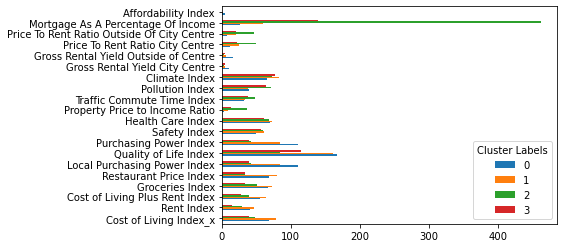

In [74]:
# Visualizing the means of each group
kmm4_df.groupby('Cluster Labels').mean().transpose().plot(kind='barh')
plt.show()

In [75]:
# Grouping the data by cluster to compare the medians
kmm4_df.groupby('Cluster Labels').median().transpose()

Cluster Labels                                    0       1       2        3
Cost of Living Index_x                       68.560   76.64   46.20   38.335
Rent Index                                   39.535   42.46   27.31   12.650
Cost of Living Plus Rent Index               54.495   61.52   39.58   27.075
Groceries Index                              66.695   71.09   44.78   33.255
Restaurant Price Index                       69.770   76.22   33.42   31.675
Local Purchasing Power Index                112.685   82.66   44.03   36.910
Quality of Life Index                       166.690  165.54   84.62  114.710
Purchasing Power Index                      112.685   82.66   44.03   36.910
Safety Index                                 48.895   63.00   59.83   59.360
Health Care Index                            69.360   73.81   66.40   59.280
Property Price to Income Ratio                3.150    8.70   34.40   12.585
Traffic Commute Time Index                   31.195   33.95   47.85   36.415
Pollution Index                              38.965   35.05   76.60   65.195
Climate Index                                71.710   85.69   70.99   77.755
Gross Rental Yield City Centre                8.425    4.21    2.17    4.470
Gross Rental Yield Outside of Centre         14.530    5.01    2.28    4.865
Price To Rent Ratio City Centre              11.870   23.78   46.02   22.355
Price To Rent Ratio Outside Of City Centre    6.880   19.95   43.93   20.550
Mortgage As A Percentage Of Income           21.780   54.92  327.55  126.390
Affordability Index                           4.590    1.82    0.31    0.790

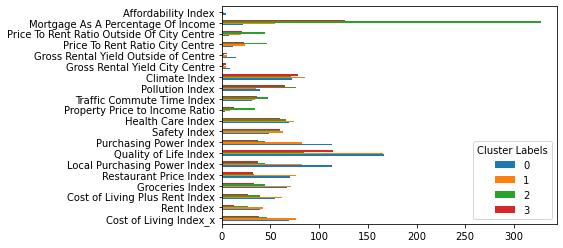

In [76]:
# Visualizing the medians of each group
kmm4_df.groupby('Cluster Labels').median().transpose().plot(kind='barh')
plt.show()

In [77]:
# Grouping the data by cluster to compare the mins
kmm4_df.groupby('Cluster Labels').min().transpose()

Cluster Labels                                                            0  \
City                                        Abu Dhabi, United Arab Emirates   
Cost of Living Index_x                                                 36.4   
Rent Index                                                            15.64   
Cost of Living Plus Rent Index                                        35.45   
Groceries Index                                                        38.2   
Restaurant Price Index                                                30.31   
Local Purchasing Power Index                                           8.64   
Quality of Life Index                                                 49.76   
Purchasing Power Index                                                 8.64   
Safety Index                                                          25.45   
Health Care Index                                                     46.04   
Property Price to Income Ratio                                         1.39   
Traffic Commute Time Index                                             17.2   
Pollution Index                                                       16.56   
Climate Index                                                         14.28   
Gross Rental Yield City Centre                                         4.57   
Gross Rental Yield Outside of Centre                                   7.24   
Price To Rent Ratio City Centre                                         2.3   
Price To Rent Ratio Outside Of City Centre                             2.14   
Mortgage As A Percentage Of Income                                      9.9   
Affordability Index                                                    0.42   

Cluster Labels                                                1  \
City                                        Adelaide, Australia   
Cost of Living Index_x                                    50.61   
Rent Index                                                19.64   
Cost of Living Plus Rent Index                            36.33   
Groceries Index                                            43.3   
Restaurant Price Index                                    47.32   
Local Purchasing Power Index                              14.63   
Quality of Life Index                                     76.83   
Purchasing Power Index                                    14.63   
Safety Index                                              30.87   
Health Care Index                                         50.68   
Property Price to Income Ratio                             4.02   
Traffic Commute Time Index                                19.28   
Pollution Index                                           13.11   
Climate Index                                             36.03   
Gross Rental Yield City Centre                             2.17   
Gross Rental Yield Outside of Centre                       2.11   
Price To Rent Ratio City Centre                           12.17   
Price To Rent Ratio Outside Of City Centre                 9.38   
Mortgage As A Percentage Of Income                        27.94   
Affordability Index                                        0.55   

Cluster Labels                                              2  \
City                                        Bangkok, Thailand   
Cost of Living Index_x                                  28.52   
Rent Index                                                9.1   
Cost of Living Plus Rent Index                          19.56   
Groceries Index                                         27.64   
Restaurant Price Index                                  18.97   
Local Purchasing Power Index                            12.35   
Quality of Life Index                                    37.1   
Purchasing Power Index                                  12.35   
Safety Index                                            35.25   
Health Care Index                                       52.77   
Proper

In [78]:
# Grouping the data by cluster to compare the max's
kmm4_df.groupby('Cluster Labels').max().transpose()

Cluster Labels                                             0  \
City                                        Winnipeg, Canada   
Cost of Living Index_x                                 91.78   
Rent Index                                             59.69   
Cost of Living Plus Rent Index                         69.63   
Groceries Index                                        96.21   
Restaurant Price Index                                 81.56   
Local Purchasing Power Index                          152.88   
Quality of Life Index                                 202.69   
Purchasing Power Index                                152.88   
Safety Index                                           87.96   
Health Care Index                                       80.5   
Property Price to Income Ratio                         12.93   
Traffic Commute Time Index                             66.78   
Pollution Index                                        89.46   
Climate Index                                          89.73   
Gross Rental Yield City Centre                         43.57   
Gross Rental Yield Outside of Centre                   46.74   
Price To Rent Ratio City Centre                        21.88   
Price To Rent Ratio Outside Of City Centre             13.81   
Mortgage As A Percentage Of Income                    238.05   
Affordability Index                                     10.1   

Cluster Labels                                                1             2  \
City                                        Zurich, Switzerland  Tehran, Iran   
Cost of Living Index_x                                   129.76         80.53   
Rent Index                                               117.61         76.28   
Cost of Living Plus Rent Index                           105.31         78.57   
Groceries Index                                          150.94         98.31   
Restaurant Price Index                                   133.26         59.15   
Local Purchasing Power Index                             147.84         71.31   
Quality of Life Index                                    203.35        141.37   
Purchasing Power Index                                   147.84         71.31   
Safety Index                                               88.2         86.53   
Health Care Index                                         83.47         87.24   
Property Price to Income Ratio                            20.22         50.89   
Traffic Commute Time Index                                60.35         62.43   
Pollution Index                                           93.51         90.72   
Climate Index                                             99.89         98.28   
Gross Rental Yield City Centre                             8.22          5.81   
Gross Rental Yield Outside of Centre                      10.67          6.92   
Price To Rent Ratio City Centre                           46.15         97.24   
Price To Rent Ratio Outside Of City Centre                47.49         82.91   
Mortgage As A Percentage Of Income                       182.48       1461.65   
Affordability Index                                        3.58          0.56   

Cluster Labels                                            3  
City                                        Zagreb, Croatia  
Cost of Living Index_x                                65.61  
Rent Index                                            33.54  
Cost of Living Plus Rent Index                        45.29  
Groceries Index                                       57.09  
Restaurant Price Index                                69.44  
Local Purchasing Power Index                          78.32  
Quality of Life Index                                164.75  
Purchasing Power Index                                78.32  
Safety Index                                          85.52  
Health Care Index                                     83.81  
Property Price to Income Ratio                        28.08  
Tr

# Vizualizing the clusters with Dimesionality Reduction

### Applying PCA to KMeans with k=4

In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.

In [80]:
# Selecting 3 components for 2D & 3D plot

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
kmm4_df['pca-one'] = pca_result[:,0]
kmm4_df['pca-two'] = pca_result[:,1] 
kmm4_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.43756436 0.19400919 0.10220279]


The first 3 principal components account for about 75% of the variance in the data. I will see if that is enought to visually set the values apart.

In [82]:
# creating a df for the cluster labels only
kmm4_labels = kmm4_df["Cluster Labels"]

Text(0.5, 1.0, 'PCA - KMeans k=4')

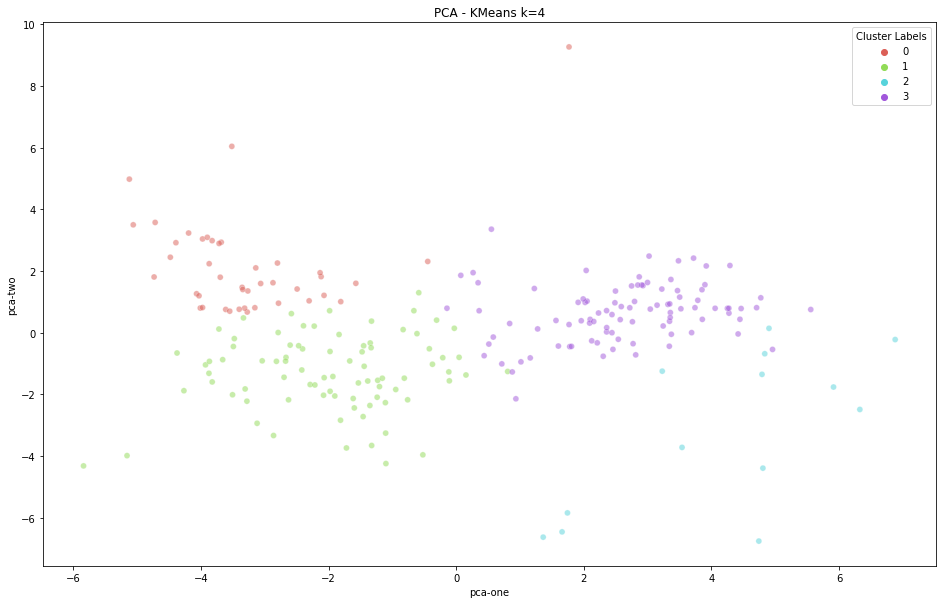

In [83]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5
).set_title('PCA - KMeans k=4')

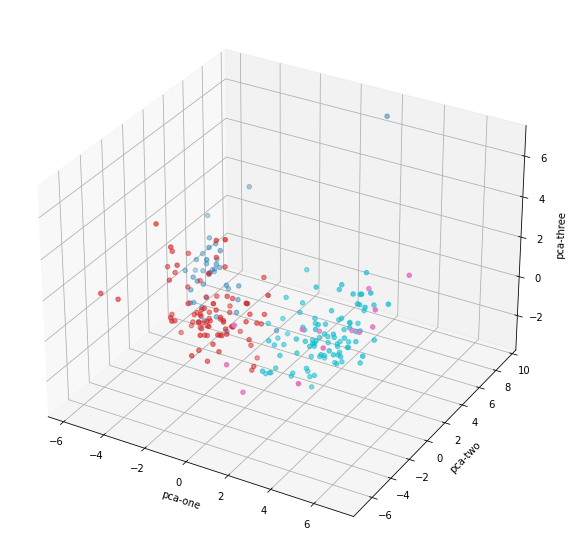

In [84]:
# 3D version of the above plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=kmm4_df["pca-one"], 
    ys=kmm4_df["pca-two"], 
    zs=kmm4_df["pca-three"], 
    c=kmm4_labels, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

After reducing dimensionality using PCA, I have been able to visualize the 4 clusters. Unfortunatley, all sns color palletes contain red & green, so it is difficult to make these graphs more accessable. Out of curiousity, I want to see what this looks like with plotly.

### Using plotly to vizualize the PCA reduced K Means k=4

In [85]:
import plotly.express as px

#2D graph
df = kmm4_df
fig = px.scatter(df, x="pca-one", y="pca-two", color=kmm4_labels)
# title alignment
fig.update_layout(title_text='K-Means k=4 PCA',title_y=1)
fig.show()

In [87]:
# Interactive 3D graph
df = kmm4_df
fig = px.scatter_3d(df, x='pca-one', y='pca-two', z='pca-three',
              color=kmm4_labels)
fig.show()

### Applying t-SNE to KMeans with k=4

I will see if t-SNE (t-Distributed Stochastic Neighbouring Entities) visualizes any differently. t-SNE employs a different methodology for dimensionality reduction than PCA, focusing on optimization of spatial properties rather than looking at variance. It produces visualization results often more powerful than PCA.

In [88]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scaled)

Text(0.5, 1.0, 't-SNE K Means k=4')

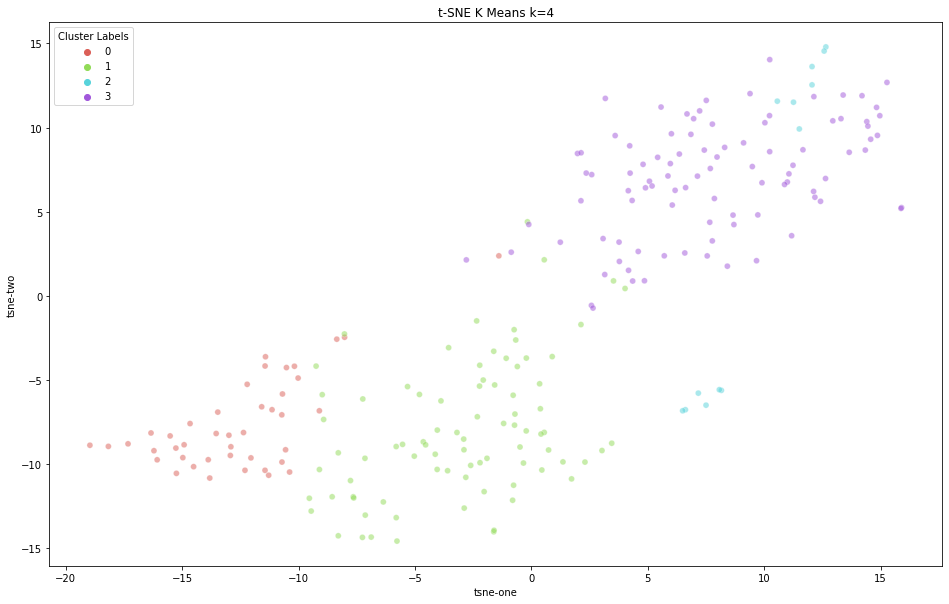

In [89]:
kmm4_df['tsne-one'] = tsne_results[:,0]
kmm4_df['tsne-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5
).set_title('t-SNE K Means k=4')

The t-SNE plot looks a little different to the PCA reduced plot. I will compare the plots side by side.

### Comparing PCA reduced & t-SNE K Means k=4

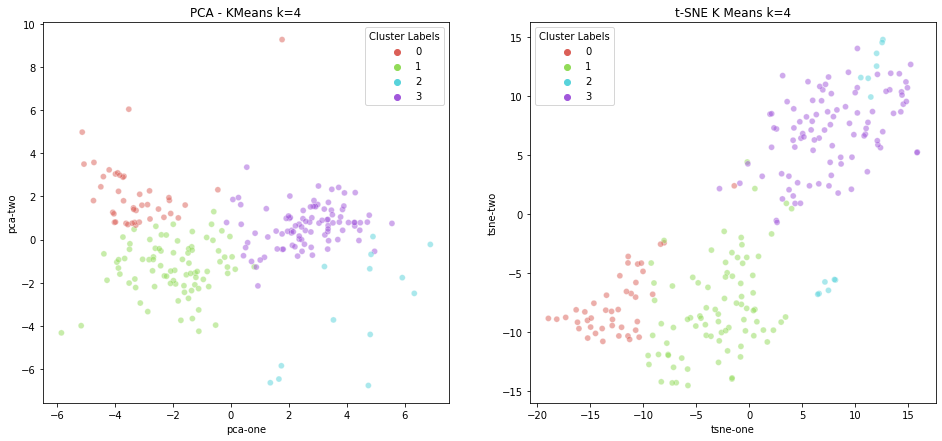

In [90]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=4')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('t-SNE K Means k=4')
plt.savefig('kmm4_pca_tsne.png', dpi=300, bbox_inches='tight')

### Using plotly to vizualize the t-SNE reduced K Means k=4

In [97]:
import plotly.express as px

#2D graph
df = kmm4_df
fig = px.scatter(df, x="tsne-one", y="tsne-two", color=kmm4_labels)
# title alignment
fig.update_layout(title_text='K-Means k=4 t-SNE',title_y=1)
fig.show()

In [96]:
# Interactive 3D graph
df = kmm4_df
fig = px.scatter_3d(df, x="tsne-one", y="tsne-two", z='pca-three',
              color=kmm4_labels)
fig.show()

Seeing as the 2 principal components only account for about 65% of the variance in the data, another way to capture all of the data is to apply t-SNE to PCA reduced data. I will chose the 20 features in the dataset as the number of components, then reduce with t-SNE.
### t-SNE on PCA reduced KMeans k=4

In [100]:
pca_20 = PCA(n_components=20)
pca_result_20 = pca_20.fit_transform(X_scaled)
print('Cumulative explained variation for 21 principal components: {}'.format(np.sum(pca_20.explained_variance_ratio_)))

Cumulative explained variation for 21 principal components: 0.9999999999999999


In [102]:
# performing t-SNE on PCA reduce K Means
tsne = TSNE(n_components=2)
tsne_pca_results = tsne.fit_transform(pca_result_20)

Text(0.5, 1.0, 't-SNE on PCA reducued KMeans k=4')

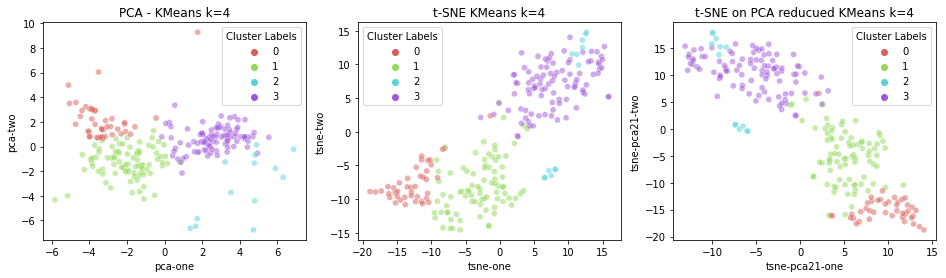

In [103]:
# Vizualizing all 3 graphs to compare

kmm4_df['tsne-pca21-one'] = tsne_pca_results[:,0]
kmm4_df['tsne-pca21-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=4')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('t-SNE KMeans k=4')

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca21-one", y="tsne-pca21-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax3
).set_title('t-SNE on PCA reducued KMeans k=4')

Each graph vizualizes the 4 clusters differently. You can see on the first plot that the points are more bunched  up, with many overlapping. The points are more separated on the other 2 plots. 

# Considering the Reccommendation System

Although it was suggested that 4 was the ideal number of clusters, I feel that is not appropriate for a reccomender system. Grouping the cities into 4, and reccomending a new city based on those groups will surely overwhelm the user. I have decided to create smaller subsets of cities so that users will have less options to consider. I will create 20 smaller subsets using the K Means Model.

### K Means Model where k = 20

In [105]:
# Instantiate K Means Model (kmm) with 20 clusters
kmm20 = KMeans(n_clusters=20)

# Fit the model
kmm20.fit(X_scaled)

# Get the labels
kmm20_clusters = kmm20.predict(X_scaled)

### Creating dataframes to hold the cluster labels

In [106]:
# creating a df for KMeans k=20 cluster labels
kmm20_df = data.copy()
kmm20_df['Cluster Labels'] = kmm20_clusters
kmm20_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               5  
1                              182.48                 0.55              17  
2                               54.08                 1.85               5  
3                               62.36                 1.60              16  
4                               67.97                 1.47               5  

[5 rows x 22 columns]

### Looking into the 20 clusters

In [107]:
# checking how many labels in this df
kmm20_df['Cluster Labels'].value_counts()

0     36
12    28
18    20
14    18
9     16
10    16
4     15
1     14
3     13
2     13
11    10
15     8
16     7
5      6
8      3
13     3
6      2
19     2
7      1
17     1
Name: Cluster Labels, dtype: int64

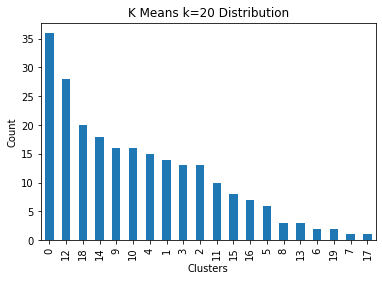

In [108]:
# checking distribution of labels
kmm20_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.title('K Means k=20 Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [109]:
# Add KMM 20 to the df that holds ALL the cluster labels from each clustering algorithm
data_all_labels['KMM_20'] = kmm20_clusters
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Pollution Index  Climate Index  \
0                  112.94         83.72  ...            18.00          81.48   
1                   14.63         52.79  ...            93.51          94.74   
2                  106.34         72.48  ...            25.49          82.61   
3                   70.16         55.63  ...            36.66          95.33   
4                   81.05         65.32  ...            23.72          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  
0                               46.21                 2.16      1       5  
1                              182.48                 0.55      1      17  
2                               54.08                 1.85      1       5  
3                               62.36                 1.60      1      16  
4                               67.97                 1.47      1       5  

[5 rows x 23 columns]

In [110]:
# Grouping the data by cluster to compare the means
kmm20_df.groupby('Cluster Labels').mean().transpose()

Cluster Labels                                      0           1   \
Cost of Living Index_x                       38.214722   62.205714   
Rent Index                                   13.738333   24.521429   
Cost of Living Plus Rent Index               26.927778   44.828571   
Groceries Index                              31.792222   54.269286   
Restaurant Price Index                       32.641389   59.971429   
Local Purchasing Power Index                 35.158889   53.675714   
Quality of Life Index                       115.625556  128.981429   
Purchasing Power Index                       35.158889   53.677857   
Safety Index                                 60.245278   48.365714   
Health Care Index                            56.397778   62.747857   
Property Price to Income Ratio               13.872222    8.589286   
Traffic Commute Time Index                   34.176944   33.320714   
Pollution Index                              64.796389   58.949286   
Climate Index                                80.576111   86.992857   
Gross Rental Yield City Centre                4.783611    5.926429   
Gross Rental Yield Outside of Centre          5.242222    6.728571   
Price To Rent Ratio City Centre              22.307222   18.612143   
Price To Rent Ratio Outside Of City Centre   20.208333   15.880714   
Mortgage As A Percentage Of Income          150.464444   60.399286   
Affordability Index                           0.769722    1.948571   

Cluster Labels                                      2           3   \
Cost of Living Index_x                       68.247692   78.805385   
Rent Index                                   38.893846   44.959231   
Cost of Living Plus Rent Index               54.713846   63.197692   
Groceries Index                              66.371538   69.733077   
Restaurant Price Index                       68.260769   76.116154   
Local Purchasing Power Index                125.910769   85.967692   
Quality of Life Index                       175.860000  162.298462   
Purchasing Power Index                      125.910769   85.967692   
Safety Index                                 43.274615   65.205385   
Health Care Index                            72.756154   74.775385   
Property Price to Income Ratio                2.118462   13.794615   
Traffic Commute Time Index                   30.496154   34.416923   
Pollution Index                              38.996923   32.494615   
Climate Index                                74.832308   77.836154   
Gross Rental Yield City Centre               10.306923    2.744615   
Gross Rental Yield Outside of Centre         18.933846    2.962308   
Price To Rent Ratio City Centre               9.864615   37.201538   
Price To Rent Ratio Outside Of City Centre    5.554615   34.682308   
Mortgage As A Percentage Of Income           14.873846   83.502308   
Affordability Index                           6.884615    1.278462   

Cluster Labels                                      4           5         6   \
Cost of Living Index_x                       37.917333  105.535000    36.250   
Rent Index                                   13.303333   60.706667    17.635   
Cost of Living Plus Rent Index               26.568000   84.861667    27.665   
Groceries Index                              33.808667   99.801667    28.865   
Restaurant Price Index                       31.692667  115.218333    32.065   
Local Purchasing Power Index                 26.608667   90.791667    18.475   
Quality of Life Index                        85.744000  179.698333    64.960   
Purchasing Power Index                       26.608667   90.791667    18.475   
Safety Index                                 36.100000   73.860000    40.935   
Health Care Index                            55.163333   73.870000    60.875   
Property Price to Income Ratio               16.065333    9.550000    41.950   
Traffic Commute Time Index                   50.079333   29.020000    50.525   
Pollution Index   

In [112]:
# looking at cluster 17 city names only (smallest group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 17]

1    Beirut, Lebanon
Name: City, dtype: object

In [113]:
# looking at cluster 7 city names only (smallest group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 7]

188    Lagos, Nigeria
Name: City, dtype: object

Beirut, Lebanon & Lagos, Nigeria are single in their own cluster.

In [116]:
# looking at cluster 19 city names only (small group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 19]

57    Cleveland, OH, United States
92      Detroit, MI, United States
Name: City, dtype: object

In [117]:
# looking at cluster 6 city names only (small group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 6]

187    Buenos Aires, Argentina
191               Tehran, Iran
Name: City, dtype: object

In [118]:
# looking at cluster 13 city names only (small group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 13]

28     Hong Kong, Hong Kong
136         Shanghai, China
155          Beijing, China
Name: City, dtype: object

In [119]:
# looking at cluster 8 city names only (small group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 8]

35     Seoul, South Korea
108        Taipei, Taiwan
146       Shenzhen, China
Name: City, dtype: object

There are a few clusters with just a few cities, shown above.

In [114]:
# looking at cluster 0 city names only (largest group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 0]

131                 Montevideo, Uruguay
132                       Amman, Jordan
135                      Warsaw, Poland
140                      Gdansk, Poland
149                     Santiago, Chile
152                   Budapest, Hungary
157             Krakow (Cracow), Poland
159                     Wroclaw, Poland
160                      Poznan, Poland
166                     Sofia, Bulgaria
168                  Bucharest, Romania
170                    Belgrade, Serbia
171                     Varna, Bulgaria
172                        Lodz, Poland
173                     Tirana, Albania
178    Sarajevo, Bosnia And Herzegovina
179                    Brasilia, Brazil
180                    Novi Sad, Serbia
184                       Iasi, Romania
189                      Hanoi, Vietnam
192             Skopje, North Macedonia
195                Kiev (Kyiv), Ukraine
199                      Ankara, Turkey
200                    Yerevan, Armenia
201                      Minsk, Belarus


In [115]:
# looking at cluster 12 city names only (2nd largest group per the distribution graph)
kmm20_df['City'].loc[kmm20_df['Cluster Labels'] == 12]

18                         Haifa, Israel
19                     Sydney, Australia
21                Amsterdam, Netherlands
23                 Auckland, New Zealand
26                Eindhoven, Netherlands
30                      Perth, Australia
31                   Brisbane, Australia
36                Rotterdam, Netherlands
37                          Lyon, France
39                  Melbourne, Australia
45               Wellington, New Zealand
46                          Milan, Italy
51                     Brussels, Belgium
52     The Hague (Den Haag), Netherlands
56             Cambridge, United Kingdom
59                      Antwerp, Belgium
61            Manchester, United Kingdom
62             Edinburgh, United Kingdom
63                      Victoria, Canada
65                     Vancouver, Canada
71               Bristol, United Kingdom
77                        Bologna, Italy
78                      Cologne, Germany
81                       Berlin, Germany
82              

I notice that most clusters have cities from the same region. While this makes sense, I will reduce the number of clusters a little in hopes to capture cities from different regions within the same group. This could make the suggestions a little more exciting.

### K Means Model where k = 15

In [120]:
# Instantiate K Means Model (kmm) with 15 clusters
kmm15 = KMeans(n_clusters=15)

# Fit the model
kmm15.fit(X_scaled)

# Get the labels
kmm15_clusters = kmm15.predict(X_scaled)

### Creating dataframes to hold the cluster labels

In [121]:
# creating a df for KMeans k=15 cluster labels
kmm15_df = data.copy()
kmm15_df['Cluster Labels'] = kmm15_clusters
kmm15_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               4  
1                              182.48                 0.55              13  
2                               54.08                 1.85               4  
3                               62.36                 1.60               4  
4                               67.97                 1.47              11  

[5 rows x 22 columns]

In [122]:
# Add KMM 15 to the df that holds ALL the cluster labels from each clustering algorithm
data_all_labels['KMM_15'] = kmm15_clusters
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Climate Index  \
0                  112.94         83.72  ...          81.48   
1                   14.63         52.79  ...          94.74   
2                  106.34         72.48  ...          82.61   
3                   70.16         55.63  ...          95.33   
4                   81.05         65.32  ...          59.99   

   Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                            3.29                                  3.67   
1                            5.94                                  7.10   
2                            3.28                                  3.46   
3                            5.36                                  6.28   
4                            3.10                                  3.87   

   Price To Rent Ratio City Centre  \
0                            30.39   
1                            16.84   
2                            30.51   
3                            18.67   
4                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  \
0                               46.21                 2.16      1       5   
1                              182.48                 0.55      1      17   
2                               54.08                 1.85      1       5   
3                               62.36                 1.60      1      16   
4                               67.97                 1.47      1       5   

   KMM_15  
0       4  
1      13  
2       4  
3       4  
4      11  

[5 rows x 24 columns]

### Looking into the 15 clusters

In [123]:
# checking how many labels in this df
kmm15_df['Cluster Labels'].value_counts()

12    34
11    29
0     22
9     20
10    19
1     17
13    17
6     16
3     14
4     12
14    12
2     10
5      6
7      3
8      1
Name: Cluster Labels, dtype: int64

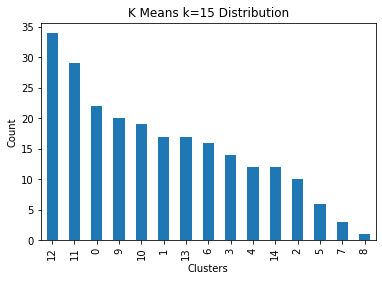

In [124]:
# checking distribution of labels
kmm15_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.title('K Means k=15 Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [125]:
# looking at cluster 8 city names only (smallest group per the distribution graph)
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 8]

188    Lagos, Nigeria
Name: City, dtype: object

Lagos, Nigeria also seems to be singled out when k=15

In [126]:
# looking at cluster 7 city names only (2nd smallest group per the distribution graph)
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 7]

187    Buenos Aires, Argentina
191               Tehran, Iran
206         Colombo, Sri Lanka
Name: City, dtype: object

Again, the are a few clusters with minimal amount of cities to compare. Interestigly, these clusters are very similar to the groups where k=20.

In [127]:
# looking at cluster 12 city names only (largest group per the distribution graph)
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 12]

122                Thessaloniki, Greece
127                 Panama City, Panama
135                      Warsaw, Poland
140                      Gdansk, Poland
152                   Budapest, Hungary
157             Krakow (Cracow), Poland
159                     Wroclaw, Poland
160                      Poznan, Poland
166                     Sofia, Bulgaria
168                  Bucharest, Romania
170                    Belgrade, Serbia
171                     Varna, Bulgaria
172                        Lodz, Poland
173                     Tirana, Albania
178    Sarajevo, Bosnia And Herzegovina
179                    Brasilia, Brazil
180                    Novi Sad, Serbia
184                       Iasi, Romania
189                      Hanoi, Vietnam
192             Skopje, North Macedonia
195                Kiev (Kyiv), Ukraine
199                      Ankara, Turkey
200                    Yerevan, Armenia
201                      Minsk, Belarus
203             Odessa (Odesa), Ukraine


In [128]:
# looking at cluster 11 city names only (2nd largest group per the distribution graph)
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 11]

4                  Oslo, Norway
8         Tel Aviv-Yafo, Israel
9           Copenhagen, Denmark
15       Luxembourg, Luxembourg
16                Paris, France
17                 Tokyo, Japan
19            Sydney, Australia
21       Amsterdam, Netherlands
23        Auckland, New Zealand
24         Singapore, Singapore
25            Stockholm, Sweden
31          Brisbane, Australia
33            Helsinki, Finland
39         Melbourne, Australia
41           Gothenburg, Sweden
43              Munich, Germany
56    Cambridge, United Kingdom
62    Edinburgh, United Kingdom
65            Vancouver, Canada
68              Toronto, Canada
70             Hamburg, Germany
72           Frankfurt, Germany
78             Cologne, Germany
81              Berlin, Germany
82           Stuttgart, Germany
83          Mississauga, Canada
84              Vienna, Austria
90      Glasgow, United Kingdom
91          Dusseldorf, Germany
Name: City, dtype: object

In [129]:
# looking at Toronto, Canada only
kmm15_df.loc[kmm15_df['City'] == 'Toronto, Canada']

City  Cost of Living Index_x  Rent Index  \
68  Toronto, Canada                   73.61       50.67   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
68                           63.03            69.22                   73.91   

    Local Purchasing Power Index  Quality of Life Index  \
68                          91.9                 152.52   

    Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
68                    91.9         59.31  ...                       45.13   

    Pollution Index  Climate Index  Gross Rental Yield City Centre  \
68            38.09          65.35                            3.98   

    Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
68                                  3.63                            25.16   

    Price To Rent Ratio Outside Of City Centre  \
68                                       27.54   

    Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
68                               67.19                 1.49              11  

[1 rows x 22 columns]

In [130]:
# looking at cluster 11 city names only (to see which cities group with Toronto, Canada)
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 11]

4                  Oslo, Norway
8         Tel Aviv-Yafo, Israel
9           Copenhagen, Denmark
15       Luxembourg, Luxembourg
16                Paris, France
17                 Tokyo, Japan
19            Sydney, Australia
21       Amsterdam, Netherlands
23        Auckland, New Zealand
24         Singapore, Singapore
25            Stockholm, Sweden
31          Brisbane, Australia
33            Helsinki, Finland
39         Melbourne, Australia
41           Gothenburg, Sweden
43              Munich, Germany
56    Cambridge, United Kingdom
62    Edinburgh, United Kingdom
65            Vancouver, Canada
68              Toronto, Canada
70             Hamburg, Germany
72           Frankfurt, Germany
78             Cologne, Germany
81              Berlin, Germany
82           Stuttgart, Germany
83          Mississauga, Canada
84              Vienna, Austria
90      Glasgow, United Kingdom
91          Dusseldorf, Germany
Name: City, dtype: object

# Vizualizing the clusters with Dimesionality Reduction

### Applying PCA to KMeans with k=15

The first 3 principal components account for about 75% of the variance in the data. I will see if that is enough to visually set the values apart.

In [131]:
# Selecting 3 components for 2D & 3D plot
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
kmm15_df['pca15-one'] = pca_result[:,0]
kmm15_df['pca15-two'] = pca_result[:,1] 
kmm15_df['pca15-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.43756436 0.19400919 0.10220279]


In [132]:
# creating a df for the cluster labels only
kmm15_labels = kmm15_df["Cluster Labels"]
kmm15_labels

0       4
1      13
2       4
3       4
4      11
       ..
227    10
228     0
229    12
230     0
231    12
Name: Cluster Labels, Length: 232, dtype: int32

Text(0.5, 1.0, 'PCA - KMeans k=15')

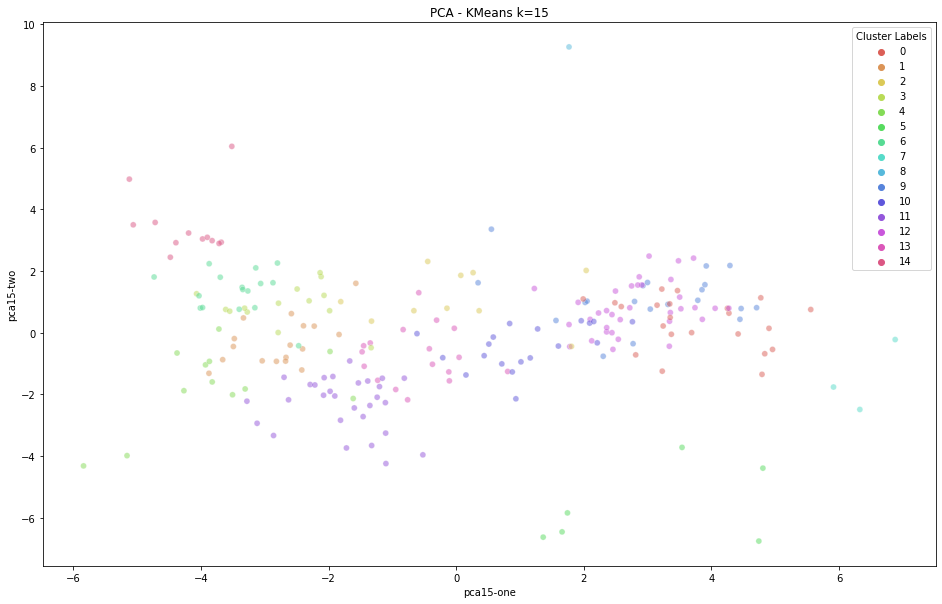

In [133]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca15-one", y="pca15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5
).set_title('PCA - KMeans k=15')

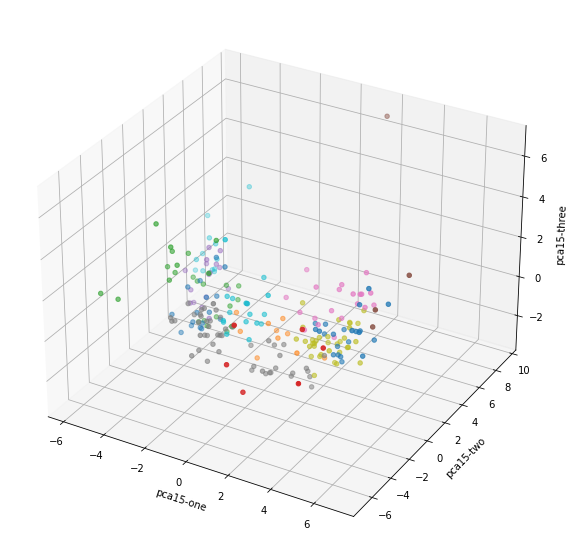

In [134]:
# 3D version of the above plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=kmm15_df["pca15-one"], 
    ys=kmm15_df["pca15-two"], 
    zs=kmm15_df["pca15-three"], 
    c=kmm15_labels, 
    cmap='tab10'
)
ax.set_xlabel('pca15-one')
ax.set_ylabel('pca15-two')
ax.set_zlabel('pca15-three')
plt.show()

### Using plotly to vizualize the PCA reduced K Means k=15

In [135]:
import plotly.express as px

#2D graph
df = kmm15_df
fig = px.scatter(df, x="pca15-one", y="pca15-two", color=kmm15_labels)
fig.update_layout(title_text='K-Means k=15 PCA',title_y=1)
fig.show()

In [136]:
# Interactive 3D graph
df = kmm15_df
fig = px.scatter_3d(df, x='pca15-one', y='pca15-two', z='pca15-three',
              color=kmm15_labels)
fig.show()

### Applying t-SNE to KMeans with k=15

In [137]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scaled)

I will see if t-SNE (t-Distributed Stochastic Neighbouring Entities) visualizes any differently. t-SNE employs a different methodology for dimensionality reduction than PCA, focusing on optimization of spatial properties rather than looking at variance. It produces visualization results often more powerful than PCA.

Text(0.5, 1.0, 't-SNE K Means k=15')

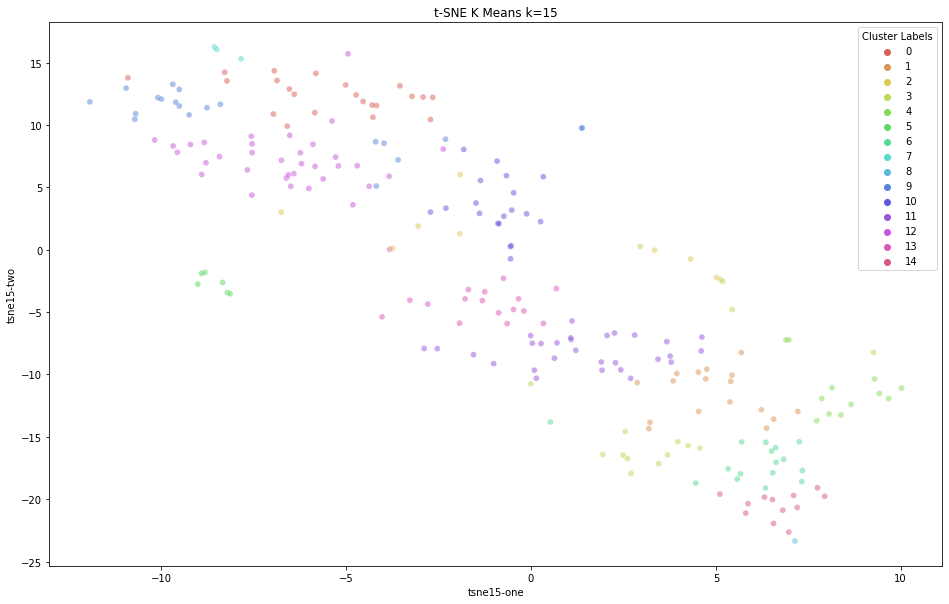

In [141]:
kmm15_df['tsne15-one'] = tsne_results[:,0]
kmm15_df['tsne15-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne15-one", y="tsne15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5
).set_title('t-SNE K Means k=15')


### Using plotly to vizualize the t-SNE reduced K Means k=15

In [142]:
import plotly.express as px

#2D graph
df = kmm15_df
fig = px.scatter(df, x="tsne15-one", y="tsne15-two", color=kmm15_labels)
# title alignment
fig.update_layout(title_text='K-Means k=15 t-SNE',title_y=1)
fig.show()

### Comparing PCA reduced & t-SNE K Means k=15

Text(0.5, 1.0, 't-SNE K Means k=15')

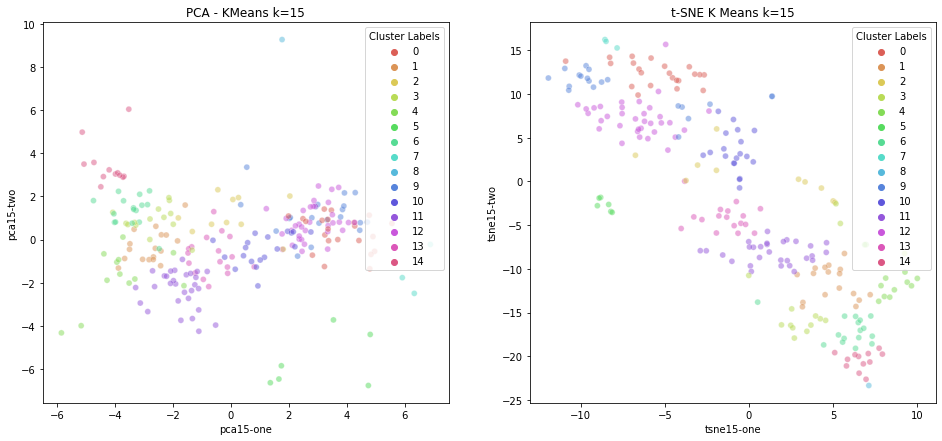

In [144]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca15-one", y="pca15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=15')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne15-one", y="tsne15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('t-SNE K Means k=15')

Seeing as the 2 principal components only account for about 65% of the variance in the data, another way to capture all of the data is to apply t-SNE to PCA reduced data. I will chose the 21 features in the dataset as the number of components, then reduce with t-SNE.
### t-SNE on PCA reduced KMeans k=15

In [145]:
pca_20 = PCA(n_components=20)
pca_result_20 = pca_20.fit_transform(X_scaled)
print('Cumulative explained variation for 20 principal components: {}'.format(np.sum(pca_20.explained_variance_ratio_)))

Cumulative explained variation for 20 principal components: 0.9999999999999999


In [146]:
# performing t-SNE on PCA reduce K Means
tsne = TSNE(n_components=2)
tsne_pca_results = tsne.fit_transform(pca_result_20)

Text(0.5, 1.0, 't-SNE on PCA reducued KMeans k=15')

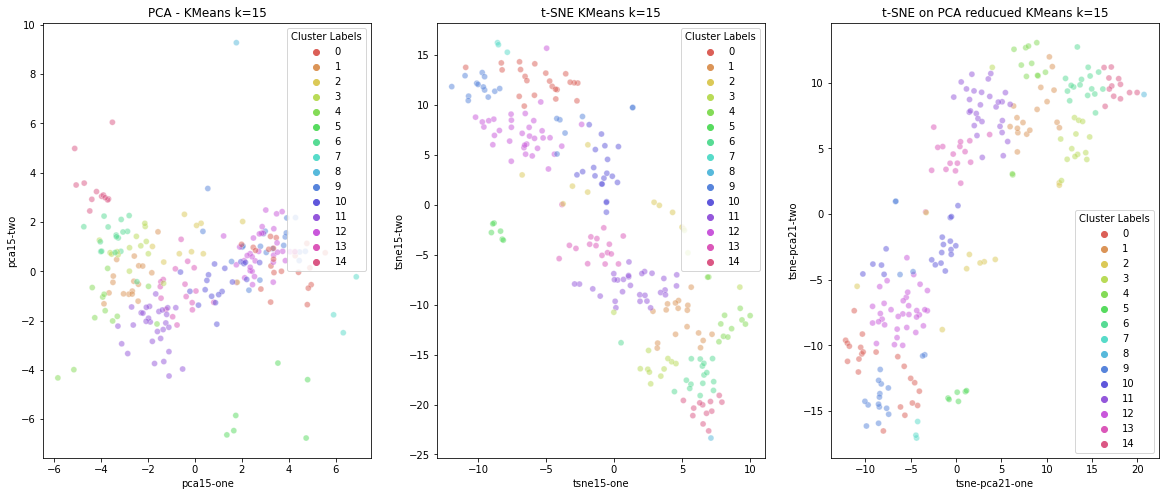

In [147]:
# Vizualizing all 3 graphs to compare

kmm15_df['tsne-pca21-one'] = tsne_pca_results[:,0]
kmm15_df['tsne-pca21-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca15-one", y="pca15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=15')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne15-one", y="tsne15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('t-SNE KMeans k=15')

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca21-one", y="tsne-pca21-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax3
).set_title('t-SNE on PCA reducued KMeans k=15')

Each graph vizualizes the 15 clusters differently. You can see on the first plot that the points are more bunched up, with many overlapping. The points are more separated on the other 2 plots. 

## Comparing the vizualizations for KMeans k=4 and KMeans k=15

### Comparing PCA visuals

Text(0.5, 1.0, 'PCA - KMeans k=15')

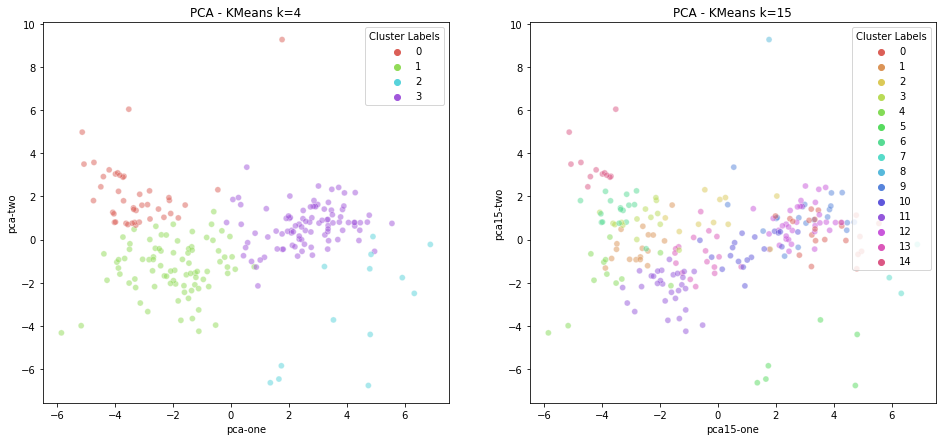

In [148]:
# Comparing PCA visuals
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=4')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca15-one", y="pca15-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('PCA - KMeans k=15')

### Comparing PCA reduced t-SNE visuals

Text(0.5, 1.0, 't-SNE on PCA reducued KMeans k=15')

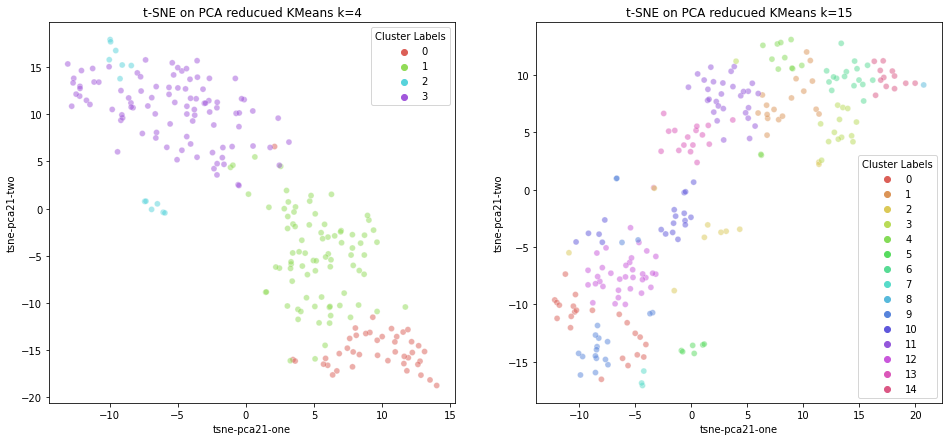

In [149]:
# Comparing t-SNE PCA visuals
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-pca21-one", y="tsne-pca21-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('t-SNE on PCA reducued KMeans k=4')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca21-one", y="tsne-pca21-two",
    hue=kmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('t-SNE on PCA reducued KMeans k=15')

Comparing the plots, I can see how the 4 mega clusters and then split into 15 smaller clusters.

# DBSCAN
I will try DBSCAN, another unsupervise clustering algorithm. Practically speaking, DBSCAN is employed similarly to any other clustering algorithm by looking at metrics for goodness of fit such as the silhouette score, (note that inertia is not used here as there are no cluster centers). It explores the space of hyperparameters eps - a float that tells the algorithm when two points are close, & the minimum number of samples - an integer that captures it density.

In [120]:
from sklearn.cluster import DBSCAN
# Instantiate an empty list of silhouette scores and cluster counts
silhouette_scores = []
n_clusters = []
eps = [2.8,2.85,2.9,2.95,2.96,2.97,2.98,2.99,2.995,3.0,3.005,3.01,3.02,3.03,3.04,3.045,3.05,3.055,3.06,3.065,3.07]

# Iterate over eps
for e in eps:
    
    # Instantiate
    dbscan_model = DBSCAN(eps=e, min_samples=42)

    # Fit
    cluster_labels = dbscan_model.fit_predict(X_scaled)
    
    # Find non-noise points
    non_noise = cluster_labels[cluster_labels != -1]
    
    # Get silhouette score and number of clusters
    n_cluster = len(np.unique(non_noise))
    
    if n_cluster > 1:
        silhouette = silhouette_score(X_scaled, cluster_labels)
    else:
        silhouette = np.NaN
    
    # Append to list
    n_clusters.append(n_cluster)
    silhouette_scores.append(silhouette)

In [121]:
# Put in a dataframe
pd.DataFrame({'eps':eps, 'n_clusters':n_clusters, 'silhouette':silhouette_scores})

eps  n_clusters  silhouette
0   2.800           1         NaN
1   2.850           1         NaN
2   2.900           1         NaN
3   2.950           2    0.065894
4   2.960           2    0.065894
5   2.970           2    0.065894
6   2.980           2    0.073376
7   2.990           2    0.134878
8   2.995           2    0.140090
9   3.000           2    0.140090
10  3.005           2    0.146570
11  3.010           2    0.146570
12  3.020           2    0.160487
13  3.030           2    0.164218
14  3.040           2    0.147259
15  3.045           2    0.147259
16  3.050           2    0.149426
17  3.055           2    0.149426
18  3.060           2    0.149426
19  3.065           2    0.149426
20  3.070           1         NaN

In trying to maximize the Sillohette score, DBSCAN is suggesting 2 natural clusters with the parameters I entered. `min_samples` being 2 * number of features. I wont move forward with this model as I do not think it will be approprite for my data.

# Gaussian Mixture Model
Mixture Models are a probabilistic way of modeling data under the assumption that the whole population is composed of a number of subpopulations (without knowing which group a given observation belongs to). Gaussian Mixture Models (GMM) make the assumption that the data was sampled from a mixture of Gaussian (normal) distributions. I can use the silhouette score to find the best number of components for a given data set, so I will use 4 as determined earlier on.

### GMM with n_components = 4
I will now run a GMM with 4 clusters to see how it groups the cities into 4, and will compare it to the KMM.

In [150]:
from sklearn.mixture import GaussianMixture

# Initialize Gaussian Mixture Model (gmm) with 4 clusters
gmm4 = GaussianMixture(n_components=4)

# Fit and predict
gmm4_clusters = gmm4.fit_predict(X_scaled)

In [151]:
# creating a df for gmm cluster labels
gmm4_df = data.copy()
gmm4_df['Cluster Labels'] = gmm4_clusters
gmm4_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               0  
1                              182.48                 0.55               0  
2                               54.08                 1.85               0  
3                               62.36                 1.60               0  
4                               67.97                 1.47               0  

[5 rows x 22 columns]

In [152]:
# checking how many labels in this df
gmm4_df['Cluster Labels'].value_counts()

0    91
1    86
2    45
3    10
Name: Cluster Labels, dtype: int64

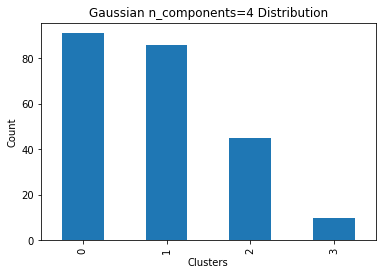

In [153]:
gmm4_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.title('Gaussian n_components=4 Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [154]:
# Adding gmm4 clusters to df holding ALL the cluster labels from each clustering algorithm
data_all_labels['GMM_4'] = gmm4_clusters
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Gross Rental Yield City Centre  \
0                  112.94         83.72  ...                            3.29   
1                   14.63         52.79  ...                            5.94   
2                  106.34         72.48  ...                            3.28   
3                   70.16         55.63  ...                            5.36   
4                   81.05         65.32  ...                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  \
0                               46.21                 2.16      1       5   
1                              182.48                 0.55      1      17   
2                               54.08                 1.85      1       5   
3                               62.36                 1.60      1      16   
4                               67.97                 1.47      1       5   

   KMM_15  GMM_4  
0       4      0  
1      13      0  
2       4      0  
3       4      0  
4      11      0  

[5 rows x 25 columns]

### Vizualizing the GMM with 4 clusters

In [155]:
# Selecting 3 components for 2D & 3D plot
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
gmm4_df['pca-one'] = pca_result[:,0]
gmm4_df['pca-two'] = pca_result[:,1] 
gmm4_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.43756436 0.19400919 0.10220279]


In [156]:
# creating a df for the cluster labels only
gmm4_labels = gmm4_df["Cluster Labels"]

Text(0.5, 1.0, 'PCA - GMM 4')

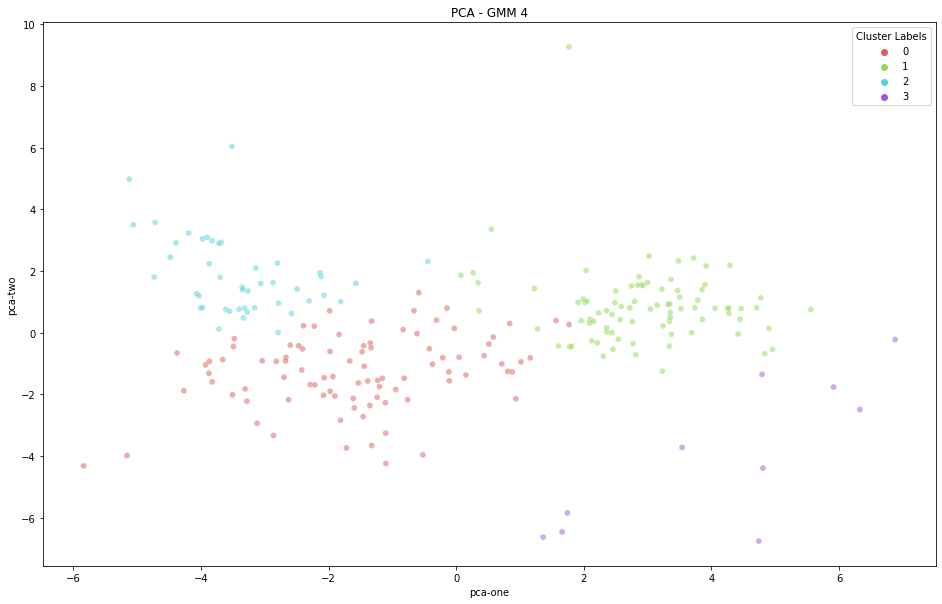

In [157]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=gmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=gmm4_df,
    legend="full",
    alpha=0.5
).set_title('PCA - GMM 4')

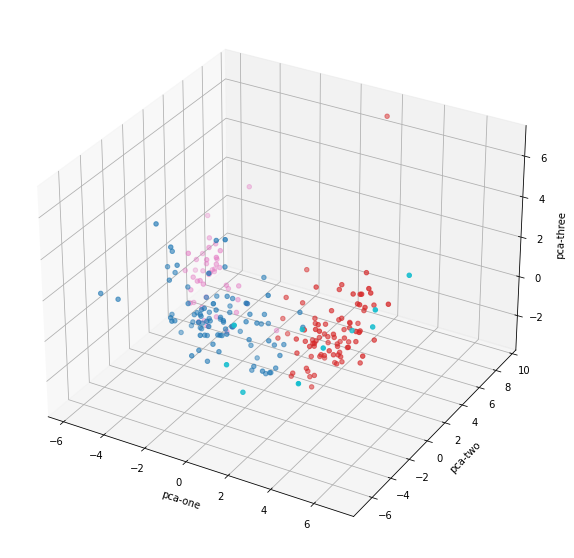

In [158]:
# 3D version of the above plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=gmm4_df["pca-one"], 
    ys=gmm4_df["pca-two"], 
    zs=gmm4_df["pca-three"], 
    c=gmm4_labels, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### Using plotly to vizualize the PCA reduced Gaussian n_components=4

In [159]:
import plotly.express as px

#2D graph
df = gmm4_df
fig = px.scatter(df, x="pca-one", y="pca-two", color=gmm4_labels)
# title alignment
fig.update_layout(title_text='Gaussian n_components=4 PCA',title_y=1)
fig.show()

The visuals look very similar to the KMM plots. I will try a GMM with 15 clusters to see how it groups the cities into 15.

### GMM with n_components = 15

In [160]:
from sklearn.mixture import GaussianMixture

# Initialize Gaussian Mixture Model (gmm) with 15 clusters
gmm15 = GaussianMixture(n_components=15)

# Fit and predict
gmm15_clusters = gmm15.fit_predict(X_scaled)

In [161]:
# creating a df for gmm cluster labels
gmm15_df = data.copy()
gmm15_df['Cluster Labels'] = gmm15_clusters
gmm15_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               7  
1                              182.48                 0.55              10  
2                               54.08                 1.85               7  
3                               62.36                 1.60               7  
4                               67.97                 1.47               7  

[5 rows x 22 columns]

In [162]:
# checking how many labels in this df
gmm15_df['Cluster Labels'].value_counts()

5     40
1     34
12    23
14    19
8     18
2     17
4     17
10    15
7     14
13    13
0      8
6      6
3      5
9      2
11     1
Name: Cluster Labels, dtype: int64

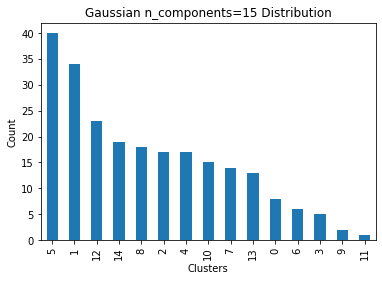

In [163]:
gmm15_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.title('Gaussian n_components=15 Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [164]:
# Adding gmm17 clusters to df holding ALL the cluster labels from each clustering algorithm
data_all_labels['GMM_15'] = gmm15_clusters
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  \
0                  112.94         83.72  ...   
1                   14.63         52.79  ...   
2                  106.34         72.48  ...   
3                   70.16         55.63  ...   
4                   81.05         65.32  ...   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  \
0                               46.21                 2.16      1       5   
1                              182.48                 0.55      1      17   
2                               54.08                 1.85      1       5   
3                               62.36                 1.60      1      16   
4                               67.97                 1.47      1       5   

   KMM_15  GMM_4  GMM_15  
0       4      0       7  
1      13      0      10  
2       4      0       7  
3       4      0       7  
4      11      0       7  

[5 rows x 26 columns]

### Vizualizing the GMM with 15 clusters

In [165]:
# Selecting 3 components for 2D & 3D plot
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
gmm15_df['pca-one'] = pca_result[:,0]
gmm15_df['pca-two'] = pca_result[:,1] 
gmm15_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.43756436 0.19400919 0.10220279]


In [167]:
# creating a df for the cluster labels only
gmm15_labels = gmm15_df["Cluster Labels"]

Text(0.5, 1.0, 'PCA - GMM 15')

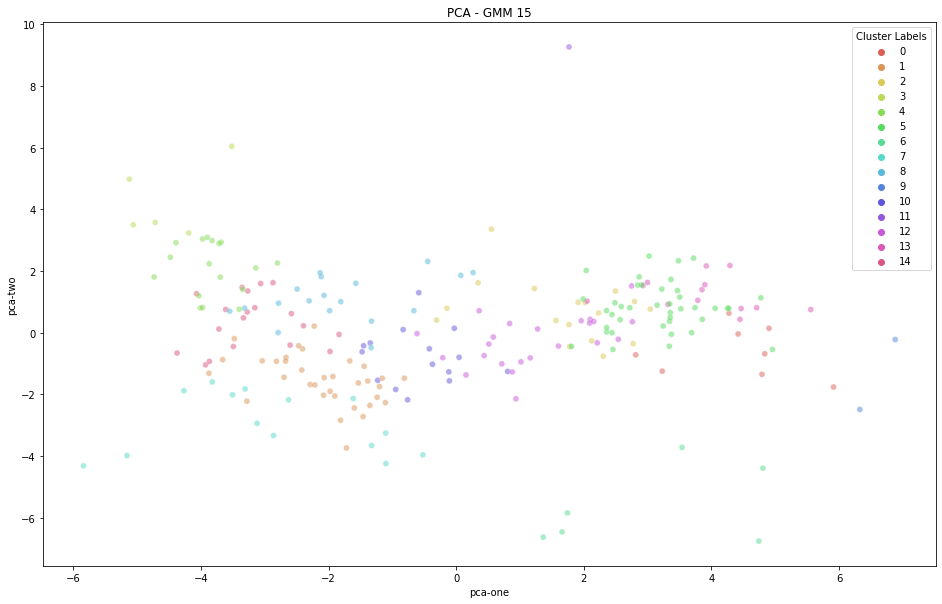

In [168]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=gmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=gmm15_df,
    legend="full",
    alpha=0.5
).set_title('PCA - GMM 15')

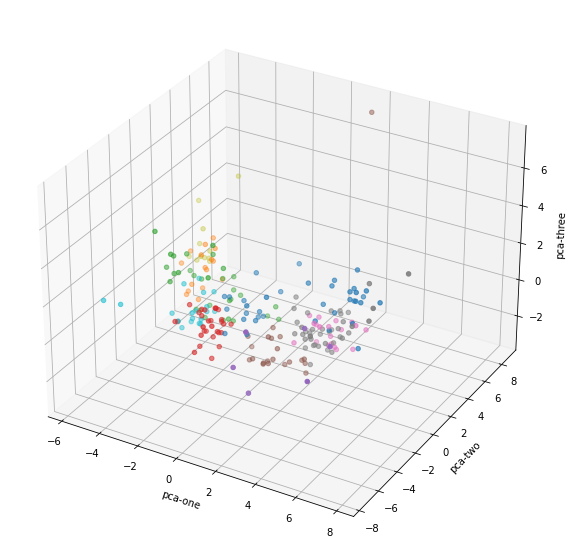

In [140]:
# 3D version of the above plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=gmm15_df["pca-one"], 
    ys=gmm15_df["pca-two"], 
    zs=gmm15_df["pca-three"], 
    c=gmm15_labels, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# Hierarchical Clustering
Hierarchical clustering algorithms apply either bottom-up or top-down approach to build a layered hierarchy on the data. At the most granular level, there are individual data points as their own clusters, while on the other end, the whole data set as a single cluster. Any level in between can be considered a specific clustering of the data set.

Agglomerative hierarchical clustering works bottom up, iteratively joining groups of data points that are nearby or similar with respect to some distance metric. Initially, each data point is made to be a cluster. A distance is calculated between each pairwise combination of clusters, and based on the distances, the two "closest" clusters are merged to form a new cluster.

I will now run a HCM to see how it groups the cities. Single Linkage calculates the shortest distance between any two points in the clusters, so I will go with that.

### HC with n_components = 4

In [169]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the model with 4 clusters and single linkage
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='single')

# Fit and predict
hc4_clusters = agglomerative.fit_predict(X_scaled)

In [170]:
# creating a df for gmm cluster labels
hc4_df = data.copy()
hc4_df['Cluster Labels'] = hc4_clusters
hc4_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               0  
1                              182.48                 0.55               3  
2                               54.08                 1.85               0  
3                               62.36                 1.60               0  
4                               67.97                 1.47               0  

[5 rows x 22 columns]

In [171]:
# checking how many labels in this df
hc4_df['Cluster Labels'].value_counts()

0    229
1      1
2      1
3      1
Name: Cluster Labels, dtype: int64

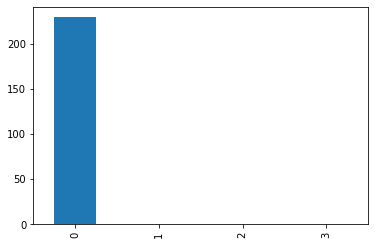

In [172]:
# checking how many labels in this df
hc4_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.show()

Looking at the distribution of the cluster labels, I see the groupings are not satisfactory. I will try 15 clusters just out of curiousity to see how the model behaves.

### HC with n_components = 15

In [173]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the model with 15 clusters and single linkage
agglomerative = AgglomerativeClustering(n_clusters=15, linkage='single')

# Fit and predict
hc15_clusters = agglomerative.fit_predict(X_scaled)

In [174]:
# creating a df for gmm cluster labels
hc15_df = data.copy()
hc15_df['Cluster Labels'] = hc15_clusters
hc15_df.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Traffic Commute Time Index  \
0                  112.94         83.72  ...                       34.93   
1                   14.63         52.79  ...                       39.82   
2                  106.34         72.48  ...                       25.49   
3                   70.16         55.63  ...                       41.19   
4                   81.05         65.32  ...                       31.21   

   Pollution Index  Climate Index  Gross Rental Yield City Centre  \
0            18.00          81.48                            3.29   
1            93.51          94.74                            5.94   
2            25.49          82.61                            3.28   
3            36.66          95.33                            5.36   
4            23.72          59.99                            3.10   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  Cluster Labels  
0                               46.21                 2.16               6  
1                              182.48                 0.55               7  
2                               54.08                 1.85               6  
3                               62.36                 1.60               0  
4                               67.97                 1.47               0  

[5 rows x 22 columns]

In [175]:
# checking how many labels in this df
hc15_df['Cluster Labels'].value_counts()

0     215
1       2
2       2
6       2
3       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
Name: Cluster Labels, dtype: int64

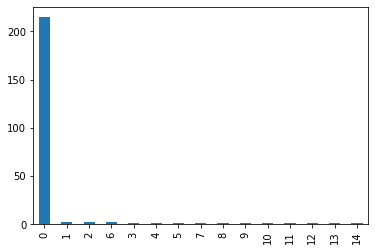

In [176]:
# checking how many labels in this df
hc15_df['Cluster Labels'].value_counts().plot(kind='bar')
plt.show()

Again, the results are not satisfactory. I will scrap this model. 

# Comparing the KMM & GMM
The 2 unsupervised learning models I can compare moving forward are the K Means and Gaussian Mixture Models.

In [177]:
# looking af df with all the labels
data_all_labels.head(5)

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  \
0                  112.94         83.72  ...   
1                   14.63         52.79  ...   
2                  106.34         72.48  ...   
3                   70.16         55.63  ...   
4                   81.05         65.32  ...   

   Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
0                                  3.67                            30.39   
1                                  7.10                            16.84   
2                                  3.46                            30.51   
3                                  6.28                            18.67   
4                                  3.87                            32.29   

   Price To Rent Ratio Outside Of City Centre  \
0                                       27.27   
1                                       14.08   
2                                       28.89   
3                                       15.93   
4                                       25.82   

   Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  \
0                               46.21                 2.16      1       5   
1                              182.48                 0.55      1      17   
2                               54.08                 1.85      1       5   
3                               62.36                 1.60      1      16   
4                               67.97                 1.47      1       5   

   KMM_15  GMM_4  GMM_15  
0       4      0       7  
1      13      0      10  
2       4      0       7  
3       4      0       7  
4      11      0       7  

[5 rows x 26 columns]

In [178]:
# Makeing dataframe to view and compare 4 clusters by KMM and GMM
data_4_clusters = data_all_labels[['City', 'KMM_4', 'GMM_4']]

In [179]:
data_4_clusters.sort_values(by="KMM_4").head(100)

City  KMM_4  GMM_4
115          Tucson, AZ, United States      0      2
27      Minneapolis, MN, United States      0      2
99          Orlando, FL, United States      0      2
97        Las Vegas, NV, United States      0      2
96                      Regina, Canada      0      2
67          Buffalo, NY, United States      0      2
92          Detroit, MI, United States      0      2
38       Pittsburgh, PA, United States      0      2
89          Phoenix, AZ, United States      0      2
42          Chicago, IL, United States      0      2
87     Jacksonville, FL, United States      0      2
101         Madison, WI, United States      0      2
86                    Winnipeg, Canada      0      2
50          Atlanta, GA, United States      0      2
80        Charlotte, NC, United States      0      2
54            Tampa, FL, United States      0      2
57        Cleveland, OH, United States      0      2
76                     Calgary, Canada      0      2
75        Nashville, TN, United States      0      2
74        Baltimore, MD, United States      0      2
73                    Edmonton, Canada      0      2
64           Denver, CO, United States      0      2
66        Milwaukee, WI, United States      0      2
85         Columbus, OH, United States      0      2
102     Kansas City, MO, United States      0      2
34     Philadelphia, PA, United States      0      2
104         Raleigh, NC, United States      0      2
114      Cincinnati, OH, United States      0      2
124    Abu Dhabi, United Arab Emirates      0      2
118     San Antonio, TX, United States      0      2
119     Albuquerque, NM, United States      0      2
134               Riyadh, Saudi Arabia      0      2
103          Dallas, TX, United States      0      2
116         Houston, TX, United States      0      2
111          Austin, TX, United States      0      2
110   Oklahoma City, OK, United States      0      2
109    Indianapolis, IN, United States      0      2
10        Anchorage, AK, United States      0      2
106        Richmond, VA, United States      0      2
188                     Lagos, Nigeria      0      1
105     Saint Louis, MO, United States      0      2
117        Dubai, United Arab Emirates      0      2
77                      Bologna, Italy      1      0
78                    Cologne, Germany      1      0
126                   Tallinn, Estonia      1      0
121                      Madrid, Spain      1      0
129                    Valencia, Spain      1      0
72                  Frankfurt, Germany      1      0
71             Bristol, United Kingdom      1      0
144                       Muscat, Oman      1      0
70                    Hamburg, Germany      1      0
123                Ljubljana, Slovenia      1      0
79               San Juan, Puerto Rico      1      0
84                     Vienna, Austria      1      0
81                     Berlin, Germany      1      0
82                  Stuttgart, Germany      1      0
83                 Mississauga, Canada      1      0
88                    Montreal, Canada      1      0
90             Glasgow, United Kingdom      1      0
91                 Dusseldorf, Germany      1      0
113                   Barcelona, Spain      1      0
112  Salt Lake City, UT, United States      1      0
93                     Kelowna, Canada      1      0
94          Birmingham, United Kingdom      1      0
95          Spokane, WA, United States      1      0
98                        Turin, Italy      1      0
100                   Limassol, Cyprus      1      0
120                        Doha, Qatar      1      0
69                      Ottawa, Canada      1      2
0                  Zurich, Switzerland      1      0
65                   Vancouver, Canada      1      0
26              Eindhoven, Netherlands      1      0
25                   Stockholm, Sweden      1      0
24                Singapore, Singapore      1      0
23               Auckland, New Zealand      1      0
22    

I see that most of the groups are identical between the two models. There are some differences here and there. I will take a look at the 15 clusters to see if this is also the case.

In [180]:
# Makeing dataframe to view and compare 17 clusters by KMM and GMM
data_17_clusters = data_all_labels[['City', 'KMM_15', 'GMM_15']]

In [181]:
data_17_clusters.sort_values(by="KMM_15").head(100)

City  KMM_15  GMM_15
196                Novosibirsk, Russia       0       5
230                  Karachi, Pakistan       0       5
161                     Moscow, Russia       0       0
164                 Jakarta, Indonesia       0       0
167                Manila, Philippines       0       0
174             Kuala Lumpur, Malaysia       0       5
177          Ho Chi Minh City, Vietnam       0       0
181           Saint Petersburg, Russia       0       5
193                  Dhaka, Bangladesh       0      13
197                     Gurgaon, India       0       5
213                      Mumbai, India       0       0
215                   Kathmandu, Nepal       0       5
137                  Bangkok, Thailand       0       0
224                   Hyderabad, India       0       5
220                       Delhi, India       0       0
228                  Coimbatore, India       0       5
221                   Bangalore, India       0       5
222                        Pune, India       0       5
223                     Chennai, India       0       5
216                       Noida, India       0       5
225                   Ahmedabad, India       0       5
226                     Kolkata, India       0       5
40            Miami, FL, United States       1      14
44         Portland, OR, United States       1      14
45             Wellington, New Zealand       1       1
47                 Canberra, Australia       1       1
53                 Adelaide, Australia       1       1
58        San Diego, CA, United States       1      14
95          Spokane, WA, United States       1       1
36              Rotterdam, Netherlands       1       1
52   The Hague (Den Haag), Netherlands       1       1
49       Sacramento, CA, United States       1      14
115          Tucson, AZ, United States       1       8
63                    Victoria, Canada       1       1
5                   Reykjavik, Iceland       1       1
20                     Dublin, Ireland       1      14
32                       Cork, Ireland       1      14
30                    Perth, Australia       1       1
26              Eindhoven, Netherlands       1       1
134               Riyadh, Saudi Arabia       2       8
212    Astana (Nur-Sultan), Kazakhstan       2       5
148                Kuwait City, Kuwait       2       5
144                       Muscat, Oman       2       8
139      Jeddah (Jiddah), Saudi Arabia       2       8
107                    Nicosia, Cyprus       2       2
143      Sharjah, United Arab Emirates       2       8
117        Dubai, United Arab Emirates       2       8
120                        Doha, Qatar       2       8
130                    Manama, Bahrain       2      12
69                      Ottawa, Canada       3       8
73                    Edmonton, Canada       3       8
76                     Calgary, Canada       3       8
86                    Winnipeg, Canada       3       8
88                    Montreal, Canada       3       8
10        Anchorage, AK, United States       3      14
101         Madison, WI, United States       3       8
64           Denver, CO, United States       3      14
93                     Kelowna, Canada       3       8
124    Abu Dhabi, United Arab Emirates       3       8
97        Las Vegas, NV, United States       3       8
27      Minneapolis, MN, United States       3      14
89          Phoenix, AZ, United States       3       8
96                      Regina, Canada       3       8
0                  Zurich, Switzerland       4       7
7     San Francisco, CA, United States       4       7
29      Los Angeles, CA, United States       4      14
22       Washington, DC, United States       4      14
11          Oakland, CA, United States       4      14
12           Boston, MA, United States       4       7
6          New York, NY, United States       4       7
13          Seattle, WA, United States       4      14
55         San Jose, CA, United States       4      14
2                  

There are definately some inconsistencies when comparing the cities grouped into 15 sub groups. I will compare the visuals for each to get a better look.

### Comparing Vizuals for KMM k=4 and GMM n_components=4

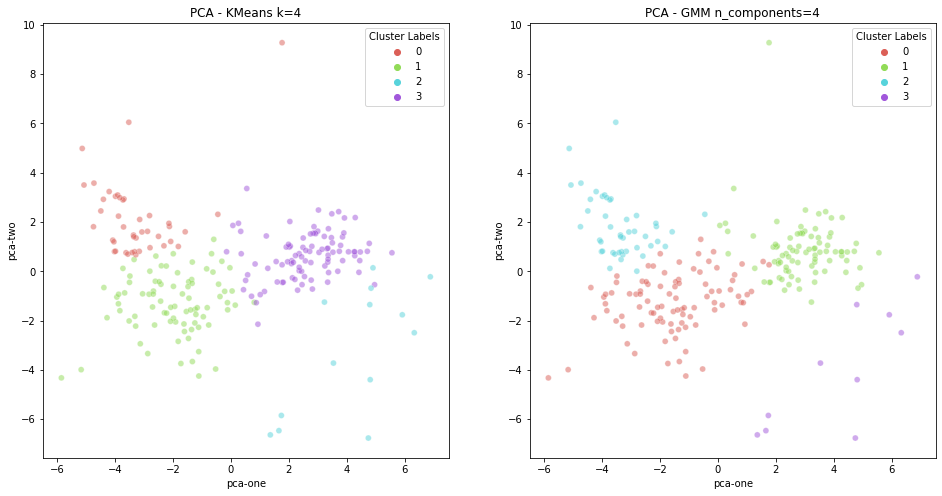

In [182]:
# Comparing PCA visuals for KMM (k=4) and GMM (n_components=4) 
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=kmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=4')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=gmm4_labels,
    palette=sns.color_palette("hls", 4),
    data=gmm4_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('PCA - GMM n_components=4')
plt.savefig('kmm_gmm4.png', dpi=300, bbox_inches='tight')

The groupings look almost identical! This agreement between algorithms confirms can be used as a performance evaluation. Awesome!

### Comparing Vizuals for KMM k=15 and GMM n_components=15

Text(0.5, 1.0, 'PCA - GMM n_components=15')

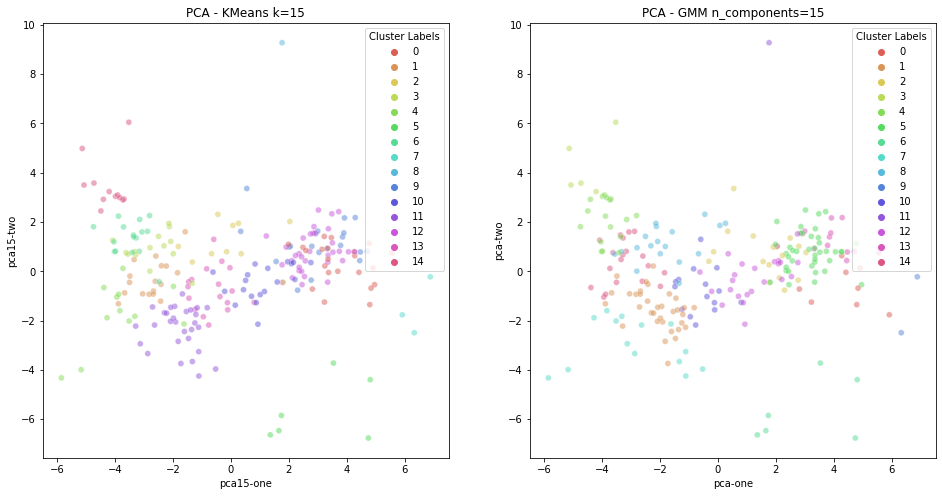

In [187]:
# Comparing PCA visuals for KMM (k=15) and GMM (n_components=15) 
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca15-one", y="pca15-two",
    hue=kmm15_labels,

    palette=sns.color_palette("hls", 15),
    data=kmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax1
).set_title('PCA - KMeans k=15')

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=gmm15_labels,
    palette=sns.color_palette("hls", 15),
    data=gmm15_df,
    legend="full",
    alpha=0.5,
    ax=ax2
).set_title('PCA - GMM n_components=15')


# Considering other distance calculations

## Cosine Similarities
 Cosine Similarities measures the similarity between 2 objects and shows which similarities are the highest.

In [188]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(numeric_data)

In [189]:
# Checking the shape
# rows and columns should be equal, and the number of movies we started with (rows)
similarities.shape

(232, 232)

In [196]:
# a function using cosine similarity to test similarities between cities
def city_recommender(City, data, distances):
    
    # Get the city
    city_index = data[data['City'] == City].index
    
    # Create a dataframe with the cities
    sim_df = pd.DataFrame({'city':data['City'], 'similarity': np.array(similarities[city_index, :].squeeze())})
    
    # Get the top 10 cities
    top_cities = sim_df.sort_values(by='similarity', ascending=False).head(10)
    
    return top_cities

In [192]:
# Testing the recommender with Paris, France
similar_cities = city_recommender("Paris, France", data, similarities)
similar_cities.head(10)

city  similarity
16            Paris, France    1.000000
46             Milan, Italy    0.987025
14   London, United Kingdom    0.986208
60              Rome, Italy    0.985974
8     Tel Aviv-Yafo, Israel    0.985299
24     Singapore, Singapore    0.975661
113        Barcelona, Spain    0.972836
77           Bologna, Italy    0.972194
17             Tokyo, Japan    0.971068
25        Stockholm, Sweden    0.970676

## Euclidean Distances
Similar to Cosine Similarity, but uses Eulidean Distance, which I would say is more appropriate for my data as it measures straight distance between two point instead looking at the angle between 2 vectors.

In [193]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(numeric_data)

In [194]:
# Checking the shape
# rows and columns should be equal, and the number of movies we started with (rows)
distances.shape

(232, 232)

In [197]:
# a function using euclidean distances to test similarities between cities
def city_recommender(City, data, distances):
    
    # Get the city
    city_index = data[data['City'] == City].index
    
    # Create a dataframe with the cities
    dist_df = pd.DataFrame({'city':data['City'], 'similarity': np.array(distances[city_index, :].squeeze())})
    
    # Get the top 10 cities
    top_cities = dist_df.sort_values(by='similarity').head(10)
    
    return top_cities

In [198]:
# Testing the recommender with Paris, France
similar_cities_euc = city_recommender("Paris, France", data, distances)
similar_cities_euc.head(20)

city  similarity
16           Paris, France    0.000000
14  London, United Kingdom   51.265886
46            Milan, Italy   58.735001
8    Tel Aviv-Yafo, Israel   60.240226
60             Rome, Italy   66.238206
24    Singapore, Singapore   67.984767
25       Stockholm, Sweden   74.572540
17            Tokyo, Japan   75.343174
18           Haifa, Israel   76.099501
23   Auckland, New Zealand   77.094035

In [199]:
# Seeing what cluster Paris is in
data_all_labels.loc[data_all_labels['City'] == 'Paris, France']

City  Cost of Living Index_x  Rent Index  \
16  Paris, France                   86.57       52.95   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
16                           71.06            83.61                   85.06   

    Local Purchasing Power Index  Quality of Life Index  \
16                         77.24                  123.1   

    Purchasing Power Index  Safety Index  ...  \
16                   77.24         44.89  ...   

    Gross Rental Yield Outside of Centre  Price To Rent Ratio City Centre  \
16                                  2.11                            46.15   

    Price To Rent Ratio Outside Of City Centre  \
16                                       47.49   

    Mortgage As A Percentage Of Income  Affordability Index  KMM_4  KMM_20  \
16                              111.48                  0.9      1       3   

    KMM_15  GMM_4  GMM_15  
16      11      0       7  

[1 rows x 26 columns]

Paris, France belongs to cluster 11 for KMM k=15 and 7 for GMM n_components = 15. I will take a look at these clusters and see if city reccomnder above aligns with the clusters. 

In [200]:
# looking at cluster 11 city names 
kmm15_df['City'].loc[kmm15_df['Cluster Labels'] == 11]

4                  Oslo, Norway
8         Tel Aviv-Yafo, Israel
9           Copenhagen, Denmark
15       Luxembourg, Luxembourg
16                Paris, France
17                 Tokyo, Japan
19            Sydney, Australia
21       Amsterdam, Netherlands
23        Auckland, New Zealand
24         Singapore, Singapore
25            Stockholm, Sweden
31          Brisbane, Australia
33            Helsinki, Finland
39         Melbourne, Australia
41           Gothenburg, Sweden
43              Munich, Germany
56    Cambridge, United Kingdom
62    Edinburgh, United Kingdom
65            Vancouver, Canada
68              Toronto, Canada
70             Hamburg, Germany
72           Frankfurt, Germany
78             Cologne, Germany
81              Berlin, Germany
82           Stuttgart, Germany
83          Mississauga, Canada
84              Vienna, Austria
90      Glasgow, United Kingdom
91          Dusseldorf, Germany
Name: City, dtype: object

In [201]:
# looking at cluster 7 city names
gmm15_df['City'].loc[gmm15_df['Cluster Labels'] == 7]

0                  Zurich, Switzerland
2                  Geneva, Switzerland
3          Honolulu, HI, United States
4                         Oslo, Norway
6          New York, NY, United States
7     San Francisco, CA, United States
8                Tel Aviv-Yafo, Israel
12           Boston, MA, United States
14              London, United Kingdom
15              Luxembourg, Luxembourg
16                       Paris, France
17                        Tokyo, Japan
19                   Sydney, Australia
24                Singapore, Singapore
Name: City, dtype: object

# Cluster Performance evaluation
If the ground truth labels are not known, evaluation must be performed using the model itself. Sillohette Score and Davies-Bouldin Index are 2 ways to do this. As well as agreement between algorithms.

### Sillohette Score

A higher Silhouette Coefficient score relates to a model with better defined clusters.

The sillohette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

I optimized the K Means model and the Gaussian Model using the best (most appropriate) sillohette score, k=4.

In [202]:
from sklearn import metrics

# scoring for kmm4
metrics.silhouette_score(X_scaled, kmm4_clusters, metric='euclidean')

0.2859969107615012

In [203]:
# scoring for kmm15
metrics.silhouette_score(X_scaled, kmm15_clusters, metric='euclidean')

0.1763580265498754

In [204]:
# scoring for gmm4
metrics.silhouette_score(X_scaled, gmm4_clusters, metric='euclidean')

0.2664833879179931

In [205]:
# scoring for gmm15
metrics.silhouette_score(X_scaled, gmm15_clusters, metric='euclidean')

0.16680938215890173

These results are positive which is a good sign.

### Davies-Bouldin Index

A lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [206]:
from sklearn.metrics import davies_bouldin_score

# scoring for kmm4
davies_bouldin_score(X_scaled, kmm4_clusters)

1.3775400445170145

In [207]:
# scoring for kmm15
davies_bouldin_score(X_scaled, kmm15_clusters)

1.3407610843684288

In [208]:
# scoring for gmm4
davies_bouldin_score(X_scaled, gmm4_clusters)

1.3145218937840963

In [209]:
# scoring for gmm4
davies_bouldin_score(X_scaled, gmm15_clusters)

1.3637874503807967

These results are not really close to 0. The sillohette scores look more promising. And the fact that the Gaussian Mixture Model, the K Means Model and the Euclidean Distances Calculation agree, is also promising.

# Conclusion

After trying many models for my project, I found that K Means Clustering and the Gaussian Mixture Model were the most appropriate, and did well grouping the cities in to similarity groups. Unfortunatley, without real world truth, it is hard to evaluate the models and determine their acuracy. I was able to compare the models, which validated each others results. The euclidean distance test also vallidated the results, as many cities were found within the same cluster group or distance group. Of course, this does not mean the reccomedations are 100% accurate, but it makes for a more confident project. 

# Building the Reccommender System with K Means Clustering

## City Reccommender - Similar City
### Testing pre-build

In [211]:
# making a copy of the data
kmeans_recc = kmm15_df.copy()

In [212]:
kmeans_recc.head()

City  Cost of Living Index_x  Rent Index  \
0          Zurich, Switzerland                  129.76       71.87   
1              Beirut, Lebanon                  128.71       30.47   
2          Geneva, Switzerland                  120.88       72.95   
3  Honolulu, HI, United States                  104.32       67.28   
4                 Oslo, Norway                  102.45       48.24   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          103.06           131.68                  133.26   
1                           83.41           150.94                  124.52   
2                           98.78           120.73                  125.98   
3                           87.24           117.10                   90.61   
4                           77.45            97.47                  111.25   

   Local Purchasing Power Index  Quality of Life Index  \
0                        112.94                 193.31   
1                         14.63                  76.83   
2                        106.34                 184.17   
3                         70.16                 152.70   
4                         81.05                 163.46   

   Purchasing Power Index  Safety Index  ...  Cluster Labels  pca15-one  \
0                  112.94         83.72  ...               4  -5.842116   
1                   14.63         52.79  ...              13  -0.948086   
2                  106.34         72.48  ...               4  -5.160403   
3                   70.16         55.63  ...               4  -3.308890   
4                   81.05         65.32  ...              11  -3.121573   

   pca15-two  pca15-three  tsne-one   tsne-two  tsne15-one  tsne15-two  \
0  -4.325217     1.155799  6.974366  -7.228461    6.974366   -7.228461   
1  -1.846254     4.230704 -4.031519  -5.383335   -4.031519   -5.383335   
2  -3.992252     0.931999  6.896900  -7.238461    6.896900   -7.238461   
3  -1.828669     2.282403  8.141193 -11.059809    8.141193  -11.059809   
4  -2.942557     0.190823  4.621106  -7.008136    4.621106   -7.008136   

   tsne-pca21-one  tsne-pca21-two  
0        6.244669        2.992311  
1       -2.465516        6.626724  
2        6.208536        3.066836  
3        7.192369       11.352177  
4        5.200172        4.448335  

[5 rows x 31 columns]

In [216]:
# testing cluster identification for the function
cityname = kmeans_recc[kmeans_recc['City'].str.contains('Toronto, Canada')]
cityname['Cluster Labels']

68    11
Name: Cluster Labels, dtype: int32

In [217]:
# pulling the city name only
citynameinput = cityname['City']
citynameinput.values[0]

'Toronto, Canada'

In [218]:
# testing groupins for the fucntion
groupnumber = cityname['Cluster Labels']
groupnumber.values[0]

11

In [219]:
#testing group for Toronto, Canada
recommendedcities = kmeans_recc['City'].loc[((kmeans_recc['Cluster Labels'] == 11) & (kmeans_recc['City'] != 'Toronto, Canada'))]
recommendedcities

4                  Oslo, Norway
8         Tel Aviv-Yafo, Israel
9           Copenhagen, Denmark
15       Luxembourg, Luxembourg
16                Paris, France
17                 Tokyo, Japan
19            Sydney, Australia
21       Amsterdam, Netherlands
23        Auckland, New Zealand
24         Singapore, Singapore
25            Stockholm, Sweden
31          Brisbane, Australia
33            Helsinki, Finland
39         Melbourne, Australia
41           Gothenburg, Sweden
43              Munich, Germany
56    Cambridge, United Kingdom
62    Edinburgh, United Kingdom
65            Vancouver, Canada
70             Hamburg, Germany
72           Frankfurt, Germany
78             Cologne, Germany
81              Berlin, Germany
82           Stuttgart, Germany
83          Mississauga, Canada
84              Vienna, Austria
90      Glasgow, United Kingdom
91          Dusseldorf, Germany
Name: City, dtype: object

In [139]:
#testing group for Toronto, Canada
recommendedcities = kmeans_recc['City'].loc[((kmeans_recc['Cluster Labels'] == groupnumber.values[0]) & (kmeans_recc['City'] != cityname.values[0]))]
recommendedcities

3                Oslo, Norway
8       Tel Aviv-Yafo, Israel
12              Paris, France
16     Luxembourg, Luxembourg
17               Tokyo, Japan
18              Haifa, Israel
20          Sydney, Australia
22      Auckland, New Zealand
23       Singapore, Singapore
24          Stockholm, Sweden
33          Helsinki, Finland
37            Munich, Germany
39               Lyon, France
40       Melbourne, Australia
42         Gothenburg, Sweden
63          Vancouver, Canada
68            Toronto, Canada
70           Hamburg, Germany
71         Frankfurt, Germany
72    Bristol, United Kingdom
78         Stuttgart, Germany
79            Berlin, Germany
82        Mississauga, Canada
83           Cologne, Germany
86            Vienna, Austria
87        Dusseldorf, Germany
90    Glasgow, United Kingdom
Name: City, dtype: object

In [258]:
df=recommendedcities.sample(n=3)

In [261]:
print(f"Consider moving to {df.values[0]}, {df.values[1]} or {df.values[2]}.")

Consider moving to Hamburg, Germany, Paris, France or Rome, Italy.


## Actual function to reccommend similar city based on K means Clustering labels

In [220]:
def similar_city_recommendations(city_country):
    '''
    Returns 3 random cities where user could live based on the similarities to the users current city (input).
        
    Parameters: 
        - city_country (str): String value of current city, country (i.e. 'Paris, France'. USA cities are in the format: City, 2 letter State, United States)
    
    '''   
    # Setting assertations on the input parameters data types
    assert isinstance(city_country, str), 'city_country should be a string'
    
    # Filtering the `kmm15_df` dataset based on the city_country input, and creating a new sub-dataset for it
    city_name = kmm15_df[kmm15_df['City'].str.contains(city_country)]
    city_input = city_name['City']
    
    # Finding city_county kmm_15 cluster number
    group_number = city_name['Cluster Labels']
    
    # Creating a new DataFrame of cities satisfying the input parameters
        # cities based on their kmm_4 cluster label
    recommended_cities = kmm15_df['City'].loc[((kmm15_df['Cluster Labels'] == group_number.values[0]) & (kmm15_df['City'] != city_input.values[0]))]

    #recommended_cities.values
    # returning 3 random cities
    sample = recommended_cities.sample(n = 3)
    return recommended_cities.sample(n = 3)

In [222]:
#testing
similar_city_recommendations('Paris, France')

72           Frankfurt, Germany
82           Stuttgart, Germany
62    Edinburgh, United Kingdom
Name: City, dtype: object

In [223]:
#testing
similar_city_recommendations('Toronto, Canada')

23    Auckland, New Zealand
65        Vancouver, Canada
83      Mississauga, Canada
Name: City, dtype: object

In [224]:
#testing
similar_city_recommendations('Orlando, FL, United States')

112    Salt Lake City, UT, United States
106          Richmond, VA, United States
119       Albuquerque, NM, United States
Name: City, dtype: object

## City Reccomender - Different / NOT Similar

In [225]:
def different_city_recommendations(city_country):
    '''
    Returns 3 random cities where user could live not based on the similarities to the users current city, but the opposite. 
    Will return cities that are not similar to users current city (input)
        
    Parameters: 
        - city_country (str): String value of current city, country (i.e. 'Paris, France'.  USA cities are in the format: City, 2 letter State, United States)
    '''   
    # Setting assertations on the input parameters data types
    assert isinstance(city_country, str), 'city_country should be a string'
    
    # Filtering the `kmm15_df` dataset based on the city_country input, and creating a new sub-dataset for it
    city_name = kmm15_df[kmm15_df['City'].str.contains(city_country)]
    city_input = city_name['City']
    
    # Finding city_county kmm_15 cluster number
    group_number = city_name['Cluster Labels']
    
    # Creating a new DataFrame of cities satisfying the input parameters
        # cities not the same as their kmm_15 cluster label
    recommended_cities = kmm15_df['City'].loc[((kmm15_df['Cluster Labels'] != group_number.values[0]) & (kmm15_df['City'] != city_input.values[0]))]
    
    # returning 3 random cities
    return recommended_cities.sample(n = 3)

In [226]:
#testing
different_city_recommendations('Paris, France')

48               Genoa, Italy
14     London, United Kingdom
230         Karachi, Pakistan
Name: City, dtype: object

In [227]:
#testing
different_city_recommendations('Toronto, Canada')

166            Sofia, Bulgaria
186         Timisoara, Romania
187    Buenos Aires, Argentina
Name: City, dtype: object

In [228]:
#testing
different_city_recommendations('Orlando, FL, United States')

48               Genoa, Italy
168        Bucharest, Romania
21     Amsterdam, Netherlands
Name: City, dtype: object

After testing the recommender systems, it looks like they are working well. Awesome! Where will you live?